![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# <center>Data Science
## <center>Modelo de predicción de ingreso anual

<br>

| Autor  | Fecha | Comisión | Docente | Tutor | 
| --- | ---- | --- | ---| --- |
| [Francisco Tagliavini](https://linkedin.com/in/francisco-tagliavini) | 15-04-2024 | 46300 |  Estefania Karina Susanj | Gabriel Gutierrez Mas |/a>ores__

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

***

# OBJETIVO

Se propone predecir mediante algoritmos de ML si una persona puede esperar alcanzar el umbral de U$S 50.000,00.- anuales.
En este análisis el resultado presenta solo 2 opciones, siendo la variable categórica y dicotómica.['<50k' ; '>50k']
El dataset propuesto ya cuenta con información de la variable objetivo (target) a predecir.
En este escenario el MODELO propuesto es de CLASIFICACIÓN.

Para poder reliazar el análisis, el dataset propuesto cuenta con algunos parámetros ó caracteristicas adicionales las cuales serán ingresadas al modelo para un aprendizaje ó entrenamiento para luego realizar un testeo de efectividad y presisión de la parametrización obtenida.

Como una primera aproximación realizaremos algunas gráficas univariables, bivariables y multivariables como parte de la presentación del dataset. De este primer análisis obtendremos algunas conclusiones respecto a la información exixtente e intentaremos proponer algunas mejoras en los datos y formalizar su estructura como una preparación para ser ingresados al modelaje de algoritmo.

***

# 1.- Carga del dataset

## 1.1.- Paquetes de librerias a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2.-CargaDS
* Me fijo si se lee bien con los primeros 3 registros

In [2]:
df = pd.read_csv('dataset.csv')
df.head(3)

Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0           0   39         State-gov   77516  Bachelors             13   
1           1   50  Self-emp-not-inc   83311  Bachelors             13   
2           2   38           Private  215646    HS-grad              9   

       marital-status         occupation   relationship   race   sex  \
0       Never-married       Adm-clerical  Not-in-family  White  Male   
1  Married-civ-spouse    Exec-managerial        Husband  White  Male   
2            Divorced  Handlers-cleaners  Not-in-family  White  Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K

# 2.- EDA

## 2.1.- Acercamiento al dataset

### Pruebo con el método info()
Resumen del dataset luego de la carga

In [3]:
#Dimensionalidad
print("La dimensionalidad del dataset es:", df.shape)
print(f'filas: {df.shape[0]} \nColumnas: {df.shape[1]}')


La dimensionalidad del dataset es: (48842, 16)
filas: 48842 
Columnas: 16


In [4]:
#Nombres de las columnas
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [5]:
#Tipos de datos del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      48842 non-null  int64 
 1   age             48842 non-null  int64 
 2   workclass       47879 non-null  object
 3   fnlwgt          48842 non-null  int64 
 4   education       48842 non-null  object
 5   education-num   48842 non-null  int64 
 6   marital-status  48842 non-null  object
 7   occupation      47876 non-null  object
 8   relationship    48842 non-null  object
 9   race            48842 non-null  object
 10  sex             48842 non-null  object
 11  capital-gain    48842 non-null  int64 
 12  capital-loss    48842 non-null  int64 
 13  hours-per-week  48842 non-null  int64 
 14  native-country  48568 non-null  object
 15  income          48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


## Consulto por lo tipos de datos de los campos del dataset...
Veo que tipo de datos tiene cada campos del dataset

In [6]:
df.dtypes

Unnamed: 0         int64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [7]:
#Columnas con datos de tipo numérico (Int64)
list(df.select_dtypes(include='int64').columns)

['Unnamed: 0',
 'age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [8]:
#Columnas con datos de tipo Texto (Object)
list(df.select_dtypes(include='object').columns)

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

* _Las columnas 2 y 7 tienen una dimensionalidad menos al dataset (tienen valores nulos)_
* _Hay 7 columnas que son de tipo numérico_
* _Hay 9 columnas que son de tipo texto_

### Analizo los campos numericos media, mediana, min, max y percentiles
_Analizo solo campos numéricos para establecer las variaciones, dispersión y demas valores de tendencia central para tener una idea/detalle de los campos que son del tipo numérico_

In [9]:
df.describe().T

count           mean            std      min        25%  \
Unnamed: 0      48842.0   24420.500000   14099.615261      0.0   12210.25   
age             48842.0      38.643585      13.710510     17.0      28.00   
fnlwgt          48842.0  189664.134597  105604.025423  12285.0  117550.50   
education-num   48842.0      10.078089       2.570973      1.0       9.00   
capital-gain    48842.0    1079.067626    7452.019058      0.0       0.00   
capital-loss    48842.0      87.502314     403.004552      0.0       0.00   
hours-per-week  48842.0      40.422382      12.391444      1.0      40.00   

                     50%        75%        max  
Unnamed: 0       24420.5   36630.75    48841.0  
age                 37.0      48.00       90.0  
fnlwgt          178144.5  237642.00  1490400.0  
education-num       10.0      12.00       16.0  
capital-gain         0.0       0.00    99999.0  
capital-loss         0.0       0.00     4356.0  
hours-per-week      40.0      45.00       99.0

* _De los campos numéricos obtengo valores de tendencia central y de disperción de valores para tener una idea de como son los datos_
* _Cantidad de registros: 48842_
* _Mediana y media: vemos muchas diferencia de valores por lo cual vemos que hay una concentración/densidad de muestras que se encuentran más acumuladas_
* _Min, Max y media: aca podemos observar cuan dispersos se encuentran los valores_

### Listar los valores únicos de los campos que son de tipo texto [CATEGÓRICOS]

In [10]:
#Listar los valores únicos de los campos que son de tipo texto [CATEGÓRICOS]
for i in df.select_dtypes(include='object'):
    print(i)
    print(df[i].value_counts().index)

workclass
Index(['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', '?',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype='object', name='workclass')
education
Index(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th',
       'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th',
       'Doctorate', '5th-6th', '1st-4th', 'Preschool'],
      dtype='object', name='education')
marital-status
Index(['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated',
       'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype='object', name='marital-status')
occupation
Index(['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical',
       'Sales', 'Other-service', 'Machine-op-inspct', 'Transport-moving',
       'Handlers-cleaners', '?', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Priv-house-serv', 'Armed-Forces'],
      dtype='object', name='occupation')
relationship
Index(['Husband

## 2.2.- Distribución de la variable target/objetivo
### Vamos a conocer como es la variable a determinar

In [11]:
df.nunique()

Unnamed: 0        48842
age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

<Axes: xlabel='income'>

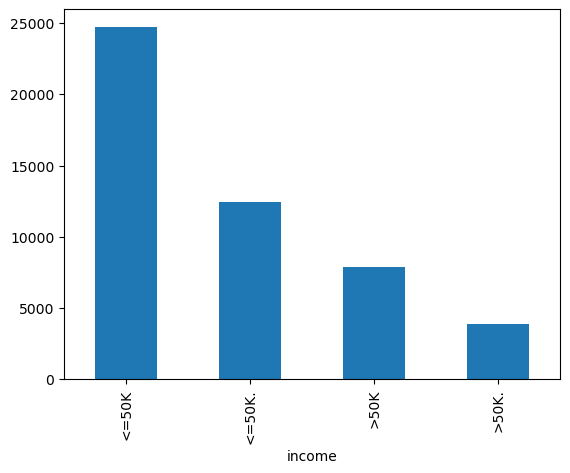

In [12]:
df['income'].value_counts().plot(kind='bar')

* _Acá vemos que la variable tiene 4 estados en lugar de 2._
* _Si prestamos atención vemos que hay una diferencias en un caracter '.' al final_

## 2.3.- Diccionario de campos y variables

* age numerico entero - puedo analizar la distribución de rango etarios de la población del dataset (74 categorias de edad)
* workclass: string (8 categorias) hay un valor no definido 
* fnlwgt: 
* education: string (16 categorias)
* education-num: numerico entero
* marital-status: string (7 categorias)
* occupation: string (15 categorias)
* relationship: string (6 categorias)
* race: string (6 categorias)
* sex: string (2 categorias)
* capital-gain:
* capital-loss:
* hours-per-week:
* native-country:
* income:

# 3.- Exploración y Limpieza de datos

##### Manupulación de datos, vistas, formatos, automatización de ETL

##### Detección de nulos, detección de duplicados, detección de outliers

##### Determinacion de métodos de rellenados/reemplazo/eliminación (cuantitativo - cualitativo/categórico)

##### Creación de nuevos campos - categorias

In [13]:
#Imprimo los primeros 5 registros del dataset
df.head()

Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0           0   39         State-gov   77516  Bachelors             13   
1           1   50  Self-emp-not-inc   83311  Bachelors             13   
2           2   38           Private  215646    HS-grad              9   
3           3   53           Private  234721       11th              7   
4           4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

## 3.1.- Elimino la columna 'Unnamed:0'
#### sobre el mismo dataframe

In [14]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [15]:
#Verifico con la dimensionalidad que se redujo a 15 columnas el dataset
df.shape

(48842, 15)

<Axes: xlabel='education-num', ylabel='education'>

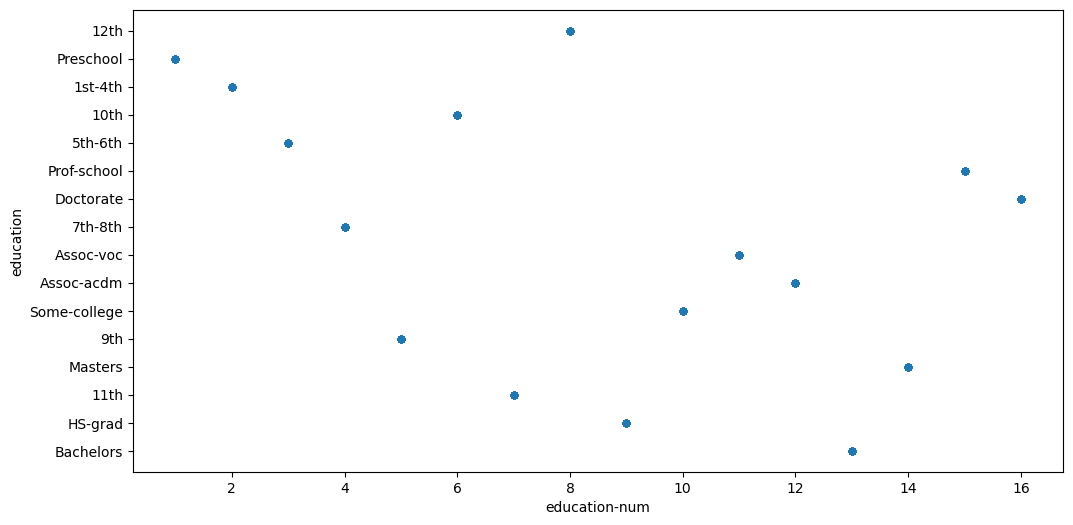

In [16]:
#Sospecho que 'Education' y 'Education-num' se encuentran relacionados como un LABEL ENCODER
df.plot(kind="scatter",     
              x='education-num',          
              y='education',          
              figsize=(12,6))

* _Acá vemos que hay una relación biunívoca (biyectiva) entre 'education' y 'education-num'_
* _es decir representan lo mismo, este valor esta duplicado y no aporta valor al dataset_
* _se propone eliminar_

## 3.2.- Elimino la columna 'education-num'

In [17]:
df.drop('education-num', axis=1,inplace=True)
df.head()

age         workclass  fnlwgt  education      marital-status  \
0   39         State-gov   77516  Bachelors       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors  Married-civ-spouse   
2   38           Private  215646    HS-grad            Divorced   
3   53           Private  234721       11th  Married-civ-spouse   
4   28           Private  338409  Bachelors  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States  <=50K  
1             0              13  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              40           Cuba  <=50K

In [18]:
df.shape

(48842, 14)

In [19]:
df['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64

In [20]:
df['capital-loss'].value_counts()

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: count, Length: 99, dtype: int64

* _los campos de 'capital-gain' y 'capital-loss' tienen la mayor parte de los registros cargados con valor '0'_
* _No aportan nada concluyente - propongo eliminarlos_

## 3.3.- Elimino las columnas 'capital-gain' y 'capital-loss'

In [21]:
df.drop('capital-gain', axis=1,inplace=True)
df.drop('capital-loss', axis=1,inplace=True)
df.head()

age         workclass  fnlwgt  education      marital-status  \
0   39         State-gov   77516  Bachelors       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors  Married-civ-spouse   
2   38           Private  215646    HS-grad            Divorced   
3   53           Private  234721       11th  Married-civ-spouse   
4   28           Private  338409  Bachelors  Married-civ-spouse   

          occupation   relationship   race     sex  hours-per-week  \
0       Adm-clerical  Not-in-family  White    Male              40   
1    Exec-managerial        Husband  White    Male              13   
2  Handlers-cleaners  Not-in-family  White    Male              40   
3  Handlers-cleaners        Husband  Black    Male              40   
4     Prof-specialty           Wife  Black  Female              40   

  native-country income  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4           Cuba  <=50K

In [22]:
df.shape

(48842, 12)

## 3.3.- MANEJO DE NULOS Y CARACTERES ESPECIALES

 #### Uso de la librería missigno

In [23]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [24]:
import missingno as msno

<Axes: >

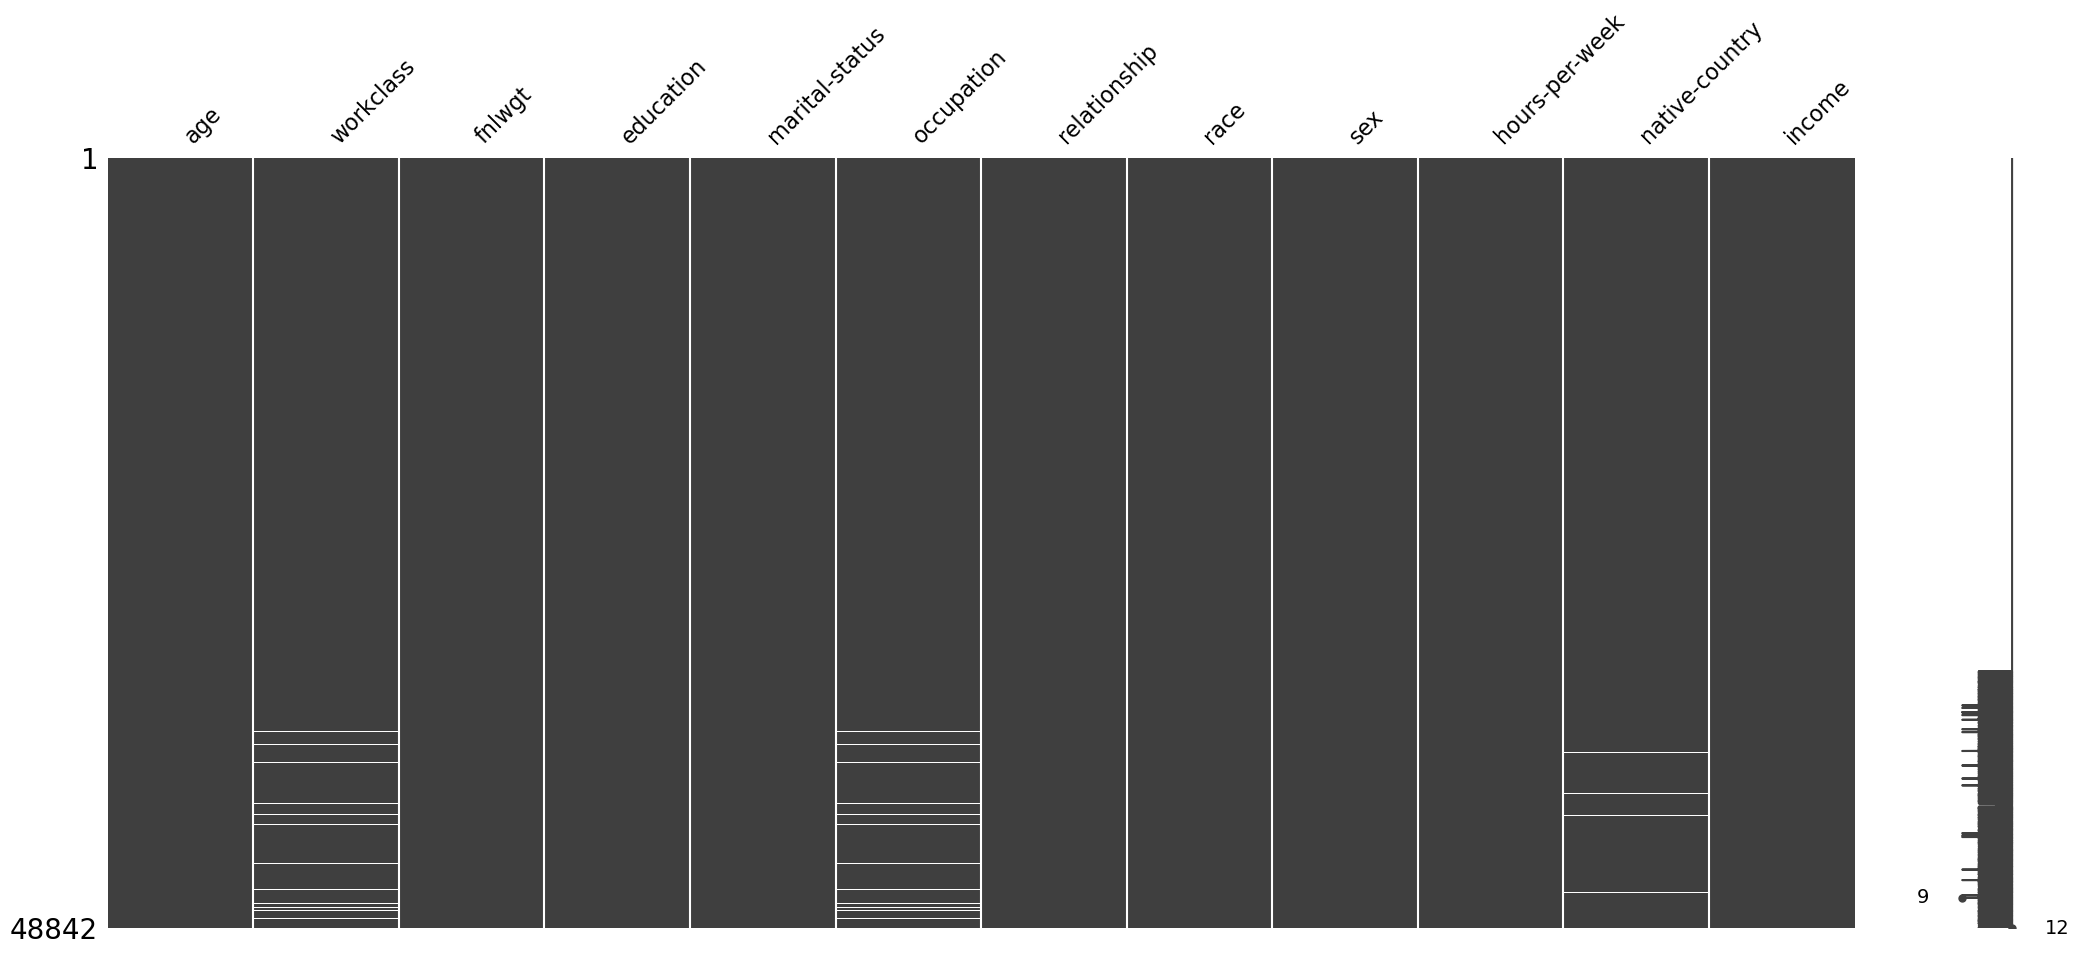

In [25]:
msno.matrix(df)

### Contabilizamos los nulos del datasets

In [26]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    274
income              0
dtype: int64

* _Veo 3 columnas con valores nulos_
* _vamos a realizar un primer análisis de cada una_
* _son casi 2000 registros nulos en 48800_

In [27]:
#Listamos las categorias del campo/propiedad 'workclass'
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [28]:
#Contabilizamos la cantidad de registros nulos del campo/propiedad 'workclass'
df['workclass'].isnull().sum()

963

<Axes: title={'center': "Visualiazación de distribución de categorias del campo 'workclass'"}, xlabel='workclass'>

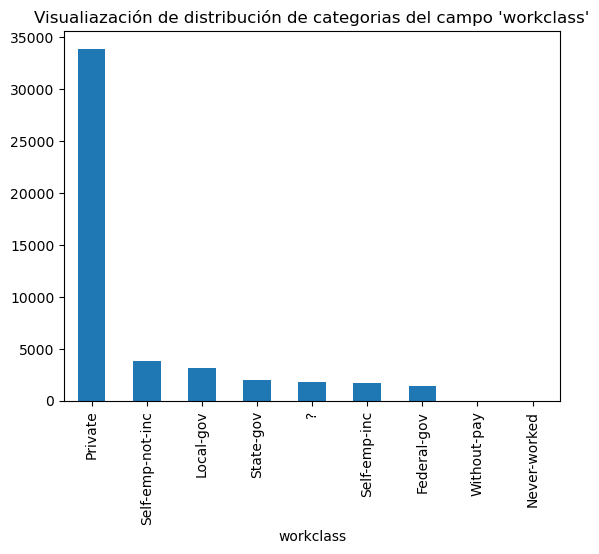

In [29]:
df['workclass'].value_counts().plot(kind='bar',title="Visualiazación de distribución de categorias del campo 'workclass'")

* Se observa que hay registros en el campo 'workclass' con valor '?'
* Se observa que hay registros en el campo 'workclass' valores nulos
* Se observa un sesgo respecto a la cantidad de registros asociados al valor 'Private'

In [30]:
#Listamos las categorias del campo/propiedad 'occupation'
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [31]:
#Contabilizamos la cantidad de registros nulos del campo/propiedad 'occupation'
df['occupation'].isnull().sum()

966

<Axes: title={'center': "Visualiazación de distribución de categorias del campo 'occupation'"}, xlabel='occupation'>

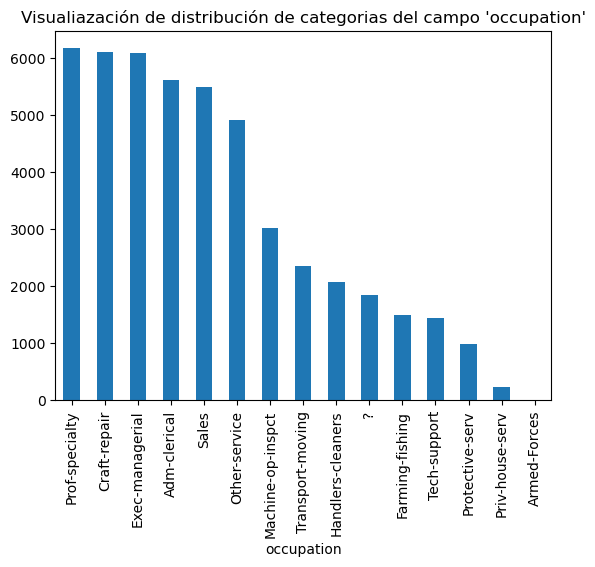

In [32]:
df['occupation'].value_counts().plot(kind='bar',title="Visualiazación de distribución de categorias del campo 'occupation'")

* Se observa que hay registros en el campo 'occupation' con valor '?'
* Se observa que hay registros en el campo 'occupation' valores nulos

In [33]:
#Listamos las categorias del campo/propiedad 'native-country'
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [34]:
#Contabilizamos la cantidad de registros nulos del campo/propiedad 'native-country'
df['native-country'].isnull().sum()

274

<Axes: title={'center': "Visualiazación de distribución de categorias del campo 'native-country'"}, xlabel='native-country'>

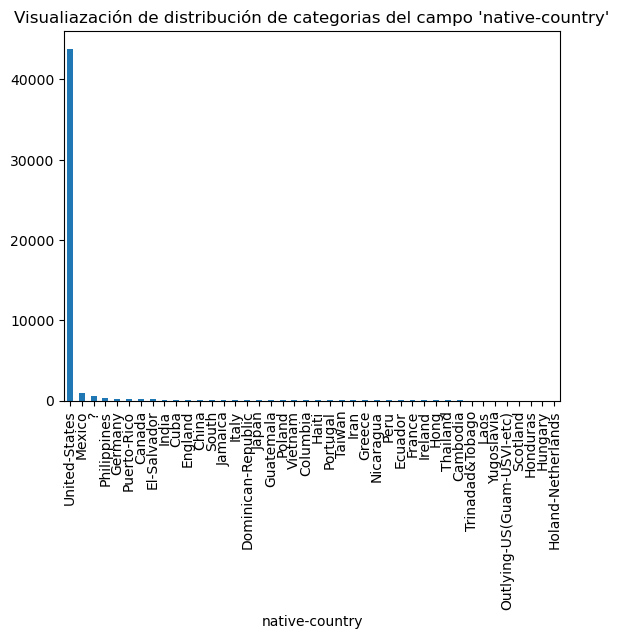

In [35]:
df['native-country'].value_counts().plot(kind='bar',title="Visualiazación de distribución de categorias del campo 'native-country'")

* _Se observa que hay registros en el dataset 'native-country' con signo '?'_
* _Se debe analizar rellenado_
* _Se observa un sesgo marcado EE.UU. y un montón de categorías con muy poca densidad. Se encuentra sumamente concentrada_

### 3.3.1.- vamos a limpiar los registros '?'

* _Por la cantidades de nulos y de '?' que encontramos parace que tienen algún tipo de relación..._
* _Voy a presentar una matriz entre los campos 'occupation' y 'worclass' a ver como se distribuyen los valores

In [36]:
pd.crosstab(index=df['occupation'],columns=df['workclass'])

workclass             ?  Federal-gov  Local-gov  Never-worked  Private  \
occupation                                                               
?                  1836            0          0             7        0   
Adm-clerical          0          487        421             0     4208   
Armed-Forces          0           15          0             0        0   
Craft-repair          0           93        211             0     4748   
Exec-managerial       0          268        331             0     3995   
Farming-fishing       0            9         43             0      670   
Handlers-cleaners     0           36         65             0     1923   
Machine-op-inspct     0           19         24             0     2882   
Other-service         0           55        300             0     4057   
Priv-house-serv       0            0          0             0      242   
Prof-specialty        0          253       1061             0     3409   
Protective-serv       0           47        450             0      299   
Sales                 0           17         16             0     4439   
Tech-support          0           96         58             0     1154   
Transport-moving      0           37        156             0     1880   

workclass          Self-emp-inc  Self-emp-not-inc  State-gov  Without-pay  
occupation                                                                 
?                             0                 0          0            0  
Adm-clerical                 47                70        375            3  
Armed-Forces                  0                 0          0            0  
Craft-repair                167               798         94            1  
Exec-managerial             617               587        287            1  
Farming-fishing              82               653         25            8  
Handlers-cleaners             6                21         19            2  
Machine-op-inspct            17                59         19            2  
Other-service                42               276        191            2  
Priv-house-serv               0                 0          0            0  
Prof-specialty              245               575        629            0  
Protective-serv               5                 7        175            0  
Sales                       420               591         20            1  
Tech-support                  9                42         87            0  
Transport-moving             38               183         60            1

* _veo que casi todos los registros que tienen el valor '?' en uno de estos campos lo tiene en el otro_
* _Observo que el valor 'Never-worked' tiene solo 7 regirtos y se encuentran asociados al valor '?'_
* _Si elimino por el campo 'occupation' tambien elimino la categiría 'Never-worked' del campo 'workclass'_
* _Total son 1843 registros sobre 48842_

In [37]:
# Genero un indice con los id de los registros que cumplen esta condicion del campo 'occupation'
# luego borro esos registros del dataset, pero para no pisar el original creo un nuevo df1
indices_borrar = df[df['occupation'] == '?'].index
df1 = df.drop(indices_borrar)

* _Validar los campos en el nuevo DS_

In [38]:
df1['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [39]:
df1['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked            3
Name: count, dtype: int64

In [40]:
df1.shape

(46999, 12)

In [41]:
df1.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    274
income              0
dtype: int64

* _También parece que tienen la misma distribución de campos nulos_
* _Vamos a verificarlo_

In [42]:
df1.loc[df1['native-country'].isna()][['workclass','occupation','native-country']].count()

workclass         255
occupation        255
native-country      0
dtype: int64

In [43]:
df1.loc[df1['occupation'].isna()][['workclass','occupation','native-country']].count()

workclass           3
occupation          0
native-country    947
dtype: int64

In [44]:
df1.loc[df1['workclass'].isna()][['workclass','occupation','native-country']].count()

workclass           0
occupation          0
native-country    944
dtype: int64

* _Todos nan de 'workclass' son nan en 'occupation'_
* _No hace match con niguna categoria difernete a nan_

In [45]:
indice_nulos = df1[df1['workclass'].isna()].index
df1.drop(indice_nulos,inplace=True)
df1.shape

(46036, 12)

In [46]:
df1.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
marital-status      0
occupation          3
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    255
income              0
dtype: int64

In [47]:
df1[df1['occupation'].isna()]

age     workclass  fnlwgt education         marital-status occupation  \
41346   17  Never-worked  131593      11th          Never-married        NaN   
44168   20  Never-worked  273905   HS-grad  Married-spouse-absent        NaN   
46459   18  Never-worked  162908      11th          Never-married        NaN   

         relationship   race     sex  hours-per-week native-country  income  
41346       Own-child  Black  Female              20  United-States  <=50K.  
44168  Other-relative  White    Male              35  United-States  <=50K.  
46459       Own-child  White    Male              35  United-States  <=50K.

In [48]:
df1['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked            3
Name: count, dtype: int64

* _estos 3 registros corresponden a la categoría 'Never-worked'_
* _Son los únicos 3 registros para esta categoría de 'workclass'_

In [49]:
#elimino los registros con el valor 'never-worked' del DS
indice_never_worked = df1[df1['occupation'].isna()].index
df1.drop(indice_never_worked, inplace=True)
df1.shape

(46033, 12)

In [50]:
df1.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    255
income              0
dtype: int64

In [51]:
df1.loc[df1['native-country'].isna()]

age     workclass  fnlwgt     education         marital-status  \
32580   40       Private   85019     Doctorate     Married-civ-spouse   
32626   41       Private  109912     Bachelors          Never-married   
32644   44  Self-emp-inc  223881       HS-grad     Married-civ-spouse   
32749   34     State-gov  513100     Bachelors  Married-spouse-absent   
32814   42   Federal-gov  177937     Bachelors          Never-married   
...    ...           ...     ...           ...                    ...   
48245   46       Private   31411          11th     Married-civ-spouse   
48272   24       Private  127159  Some-college          Never-married   
48604   24     State-gov  161783     Bachelors          Never-married   
48651   34       Private  143776       Masters          Never-married   
48826   50     Local-gov  139347       Masters     Married-civ-spouse   

             occupation    relationship                race     sex  \
32580    Prof-specialty         Husband  Asian-Pac-Islander    Male   
32626     Other-service   Not-in-family               White  Female   
32644      Craft-repair         Husband               White    Male   
32749   Farming-fishing   Not-in-family               Black    Male   
32814    Prof-specialty   Not-in-family               White    Male   
...                 ...             ...                 ...     ...   
48245     Other-service            Wife               White  Female   
48272     Other-service  Other-relative               White  Female   
48604  Transport-moving   Not-in-family               Black    Male   
48651    Prof-specialty   Not-in-family               Black    Male   
48826    Prof-specialty            Wife               White  Female   

       hours-per-week native-country  income  
32580              45            NaN   >50K.  
32626              40            NaN  <=50K.  
32644              50            NaN   >50K.  
32749              40            NaN  <=50K.  
32814              40            NaN  <=50K.  
...               ...            ...     ...  
48245              40            NaN  <=50K.  
48272              24            NaN  <=50K.  
48604              40            NaN  <=50K.  
48651              45            NaN   >50K.  
48826              40            NaN   >50K.  

[255 rows x 12 columns]

* _Me quedan estos 255 registros que no tienen 'native-country'_
* _Tengo que elegir eliminar, rellenar con algún valor_
* _es un campo categírico, muy sesgado, la recomendación para estos casos es ir por la moda_

In [52]:
df1['native-country'].mode()

0    United-States
Name: native-country, dtype: object

In [53]:
df1['native-country'] = df1['native-country'].fillna(df['native-country'].mode()[0])

In [54]:
df1.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

### CONCLUSIONES ELIMINAR NULOS
* El objetivo es poder predecir si una persona puede o no ganar más de U$S50k anualmente...
* Las personas que nunca trabajaron y participaron son muy pocas...pero es correcto que no hayan aportado ocupación.
* En total tenemos casi 49.000 registros
* Se observa que se indican horas de trabajo e incluso algunos han indicado ganancias
* Existe algún aporte/valor de información asociada a las personas que nunca trabajaron o las que no detallaron su occupación
* Es un segmento/muestra de la población válida, es posible inferir que no es suficientemente representativa
* Se pueden eliminar los registros que tengan np.nan en los campos 'occupation' y 'workclass'
* Los registros sin pais de origen se rellenaron por la moda de este campo, sumamente sesgado
*  Hay 1836 registros en los cuales no se informa 'occupation' ni 'workclass'
* hay registros que fueron registrados con '?' otros vacíos 'null'/'nan'
* Tienen ambos campos una correlación fuerte y se podría eliminar una.
* 'workclass' tiene 9 categorias
* 'occupation' tiene 15 categorias

### 2.2.2.- DUPLICADOS

In [55]:
df1.duplicated().sum()

31

In [56]:
df1[df1.duplicated()]

age         workclass  fnlwgt     education      marital-status  \
4881    25           Private  308144     Bachelors       Never-married   
5104    90           Private   52386  Some-college       Never-married   
9171    21           Private  250051  Some-college       Never-married   
11631   20           Private  107658  Some-college       Never-married   
13084   25           Private  195994       1st-4th       Never-married   
15059   21           Private  243368     Preschool       Never-married   
17040   46           Private  173243       HS-grad  Married-civ-spouse   
18555   30           Private  144593       HS-grad       Never-married   
18698   19           Private   97261       HS-grad       Never-married   
21318   19           Private  138153  Some-college       Never-married   
21490   19           Private  146679  Some-college       Never-married   
21875   49           Private   31267       7th-8th  Married-civ-spouse   
22300   25           Private  195994       1st-4th       Never-married   
22367   44           Private  367749     Bachelors       Never-married   
22494   49  Self-emp-not-inc   43479  Some-college  Married-civ-spouse   
24819   20           Private  196745  Some-college       Never-married   
25872   23           Private  240137       5th-6th       Never-married   
26313   28           Private  274679       Masters       Never-married   
27929   28           Private  148429       HS-grad  Married-civ-spouse   
28230   27           Private  255582       HS-grad       Never-married   
28522   42           Private  204235  Some-college  Married-civ-spouse   
28846   39           Private   30916       HS-grad  Married-civ-spouse   
29157   38           Private  207202       HS-grad  Married-civ-spouse   
30845   46           Private  133616  Some-college            Divorced   
31993   19           Private  251579  Some-college       Never-married   
32404   35           Private  379959       HS-grad            Divorced   
33425   24           Private  194630     Bachelors       Never-married   
43750   37           Private   52870     Bachelors  Married-civ-spouse   
43773   29           Private   36440     Bachelors       Never-married   
46409   30           Private  180317     Assoc-voc            Divorced   
48521   18      Self-emp-inc  378036          12th       Never-married   

              occupation   relationship                race     sex  \
4881        Craft-repair  Not-in-family               White    Male   
5104       Other-service  Not-in-family  Asian-Pac-Islander    Male   
9171      Prof-specialty      Own-child               White  Female   
11631       Tech-support  Not-in-family               White  Female   
13084    Priv-house-serv  Not-in-family               White  Female   
15059    Farming-fishing  Not-in-family               White    Male   
17040       Craft-repair        Husband               White    Male   
18555      Other-service  Not-in-family               Black    Male   
18698    Farming-fishing  Not-in-family               White    Male   
21318       Adm-clerical      Own-child               White  Female   
21490    Exec-managerial      Own-child               Black    Male   
21875       Craft-repair        Husband               White    Male   
22300    Priv-house-serv  Not-in-family               White  Female   
22367     Prof-specialty  Not-in-family               White  Female   
22494       Craft-repair        Husband               White    Male   
24819      Other-service      Own-child               White  Female   
25872  Handlers-cleaners  Not-in-family               White    Male   
26313     Prof-specialty  Not-in-family               White    Male   
27929  Machine-op-inspct        Husband               White    Male   
28230  Machine-op-inspct  Not-in-family               White  Female   
28522     Prof-specialty        Husband               White    Male   
28846       Craft-repair        Husband               White    Male   
29157

### No observo duplicados - en principio descarto hacer algo con estos registros

# 4.- Análisis storytelling

## 4.1.- Cómo se encuentra distribuida la muestra respecto al sexo?

<Axes: title={'center': 'Distribución por sexo en el dataset'}>

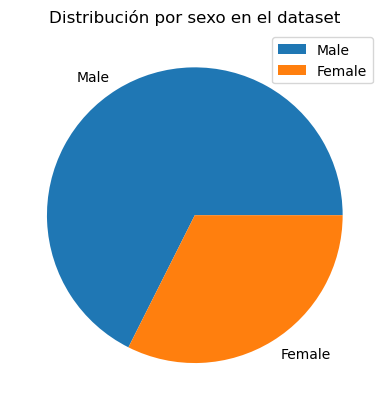

In [57]:
df1['sex'].value_counts().plot(kind='pie', title= 'Distribución por sexo en el dataset',legend=True, ylabel='')

* _más registros de hombres que mujeres_

## 4.2.- Distribución de acuerdo a la raza

<Axes: title={'center': 'Distribución por etnia en el dataset'}>

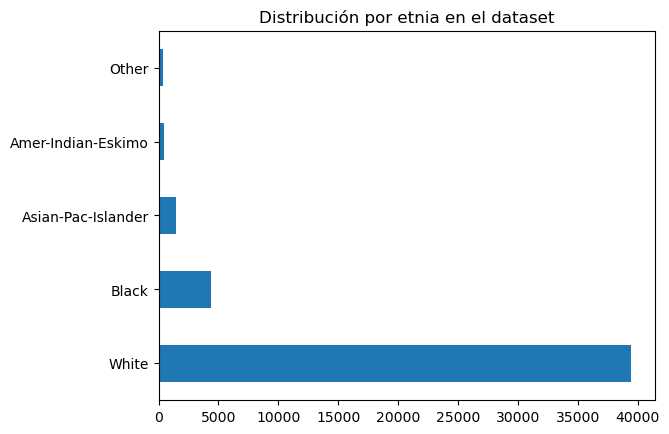

In [58]:
df1['race'].value_counts().plot(kind='barh', title= 'Distribución por etnia en el dataset',ylabel='')

* _predominio de raza blanca_

## 4.3.- Distribución de acuerdo al nivel de educacion

<Axes: xlabel='education'>

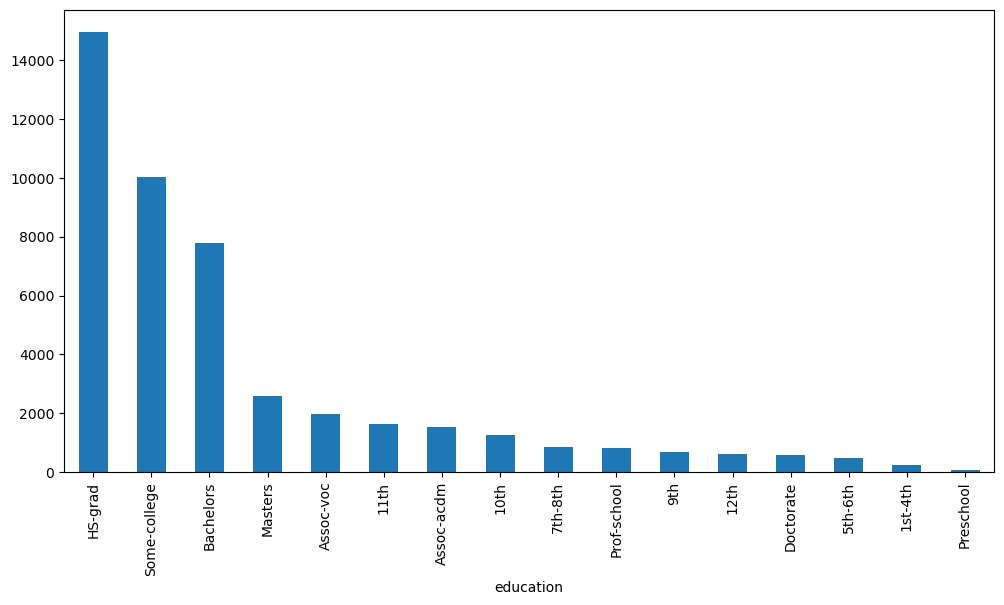

In [59]:
df1['education'].value_counts().plot(kind='bar',figsize=(12,6))

* _los primeras 3 categorías sellevan un número mayoritario de registros_

## 4.4.- Distribución por relación/vínculo 

<Axes: ylabel='marital-status'>

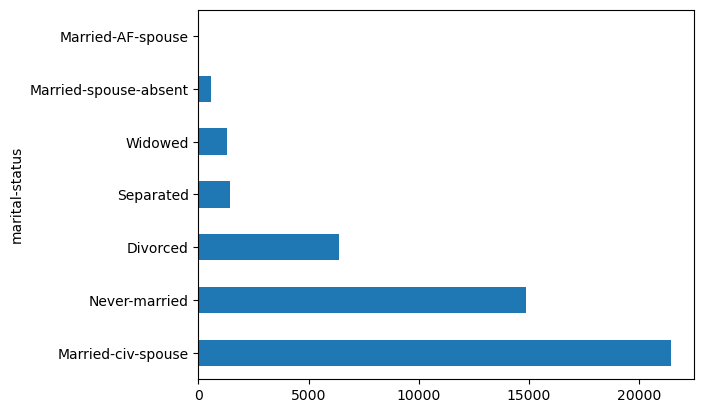

In [60]:
df1['marital-status'].value_counts().plot(kind='barh')

## 4.5.- predomina casados

* _Hay 3 categorias que corresponden a Married._
* _propongo unificar las categorías a una sola..._
* _Podríamos pensar como una reducción de dimensionalidad_

In [61]:
df1['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [62]:
df1['marital-status'].nunique()

7

In [63]:
df1['marital-status'] = df1['marital-status'].apply(lambda x: 'Married' if 'Married' in x else x)

In [64]:
df1.head()

age         workclass  fnlwgt  education marital-status         occupation  \
0   39         State-gov   77516  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc   83311  Bachelors        Married    Exec-managerial   
2   38           Private  215646    HS-grad       Divorced  Handlers-cleaners   
3   53           Private  234721       11th        Married  Handlers-cleaners   
4   28           Private  338409  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country income  
0  Not-in-family  White    Male              40  United-States  <=50K  
1        Husband  White    Male              13  United-States  <=50K  
2  Not-in-family  White    Male              40  United-States  <=50K  
3        Husband  Black    Male              40  United-States  <=50K  
4           Wife  Black  Female              40           Cuba  <=50K

In [65]:
df1['marital-status'].nunique()

5

<Axes: ylabel='marital-status'>

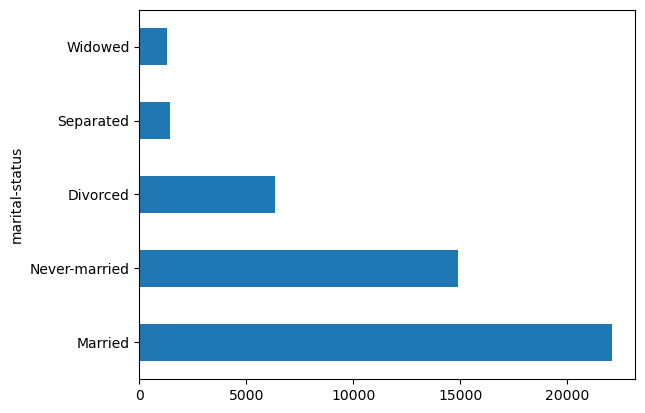

In [66]:
df1['marital-status'].value_counts().plot(kind='barh')

## 4.6.- Distribución de acuerdo al rol dentro de la relación

<Axes: ylabel='relationship'>

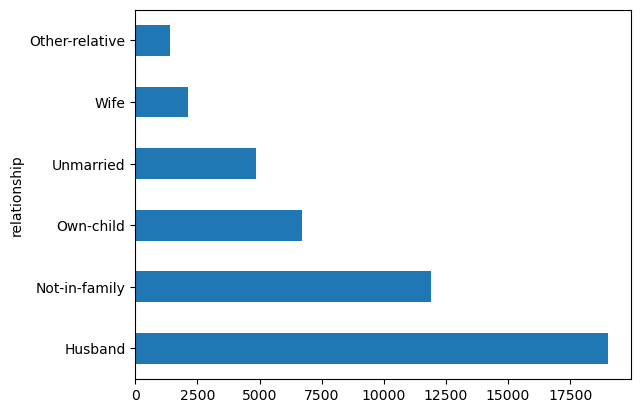

In [67]:
df1['relationship'].value_counts().plot(kind='barh')

* _Parece que tiene cierto sentido por el predominio de hombres y estado civil casado_

## 4.7.- Distribución de edades

<Axes: title={'center': 'Distribución edades'}, xlabel='age', ylabel='Ocurrencia'>

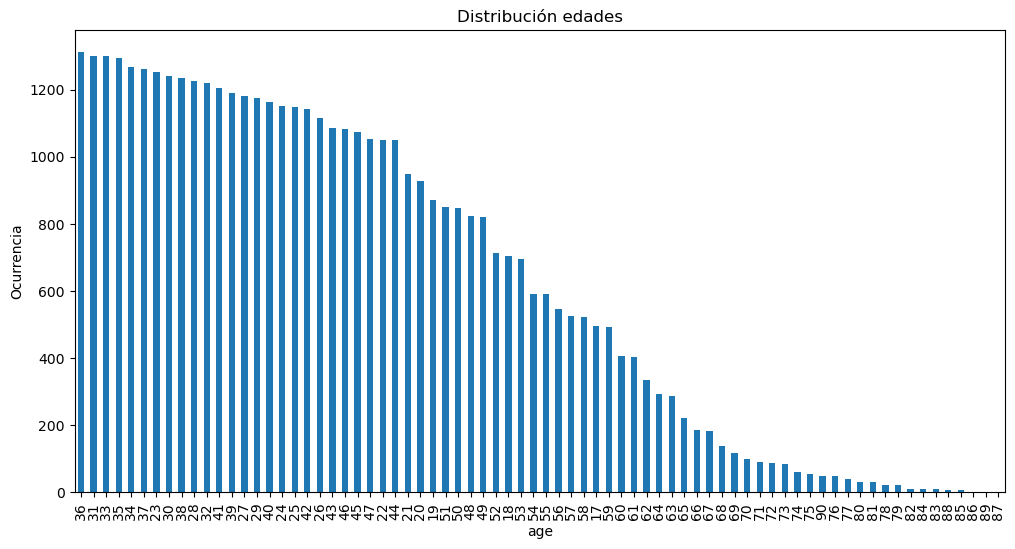

In [68]:
df1['age'].value_counts().plot(kind='bar',figsize=(12,6),title='Distribución edades',ylabel='Ocurrencia')

* _para la edad conviene analizar armar binds y armar rango de edades_

In [69]:
np.bincount(df1['age'])

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,  496,  704,  870,  927,  949,
       1050, 1252, 1150, 1149, 1115, 1181, 1225, 1175, 1241, 1300, 1218,
       1299, 1267, 1294, 1312, 1262, 1234, 1189, 1163, 1206, 1143, 1086,
       1050, 1074, 1081, 1053,  823,  820,  846,  849,  714,  695,  590,
        589,  547,  525,  521,  492,  406,  402,  333,  287,  293,  222,
        186,  182,  138,  117,   97,   90,   85,   82,   60,   53,   47,
         39,   21,   20,   29,   29,   10,    9,    9,    5,    1,    1,
          6,    1,   47], dtype=int64)

In [70]:
np.histogram_bin_edges(df1['age'],bins='fd',range=(df1['age'].min(),df1['age'].max()))
#‘fd’ (Freedman Diaconis Estimator)
#'strurges' optimal for gaussian data and underestimates number of bins for large non-gaussian datasets

array([17.        , 18.05797101, 19.11594203, 20.17391304, 21.23188406,
       22.28985507, 23.34782609, 24.4057971 , 25.46376812, 26.52173913,
       27.57971014, 28.63768116, 29.69565217, 30.75362319, 31.8115942 ,
       32.86956522, 33.92753623, 34.98550725, 36.04347826, 37.10144928,
       38.15942029, 39.2173913 , 40.27536232, 41.33333333, 42.39130435,
       43.44927536, 44.50724638, 45.56521739, 46.62318841, 47.68115942,
       48.73913043, 49.79710145, 50.85507246, 51.91304348, 52.97101449,
       54.02898551, 55.08695652, 56.14492754, 57.20289855, 58.26086957,
       59.31884058, 60.37681159, 61.43478261, 62.49275362, 63.55072464,
       64.60869565, 65.66666667, 66.72463768, 67.7826087 , 68.84057971,
       69.89855072, 70.95652174, 72.01449275, 73.07246377, 74.13043478,
       75.1884058 , 76.24637681, 77.30434783, 78.36231884, 79.42028986,
       80.47826087, 81.53623188, 82.5942029 , 83.65217391, 84.71014493,
       85.76811594, 86.82608696, 87.88405797, 88.94202899, 90.  

In [71]:
np.histogram_bin_edges(df1['age'],bins='sturges',range=(df1['age'].min(),df1['age'].max()))

array([17.        , 21.29411765, 25.58823529, 29.88235294, 34.17647059,
       38.47058824, 42.76470588, 47.05882353, 51.35294118, 55.64705882,
       59.94117647, 64.23529412, 68.52941176, 72.82352941, 77.11764706,
       81.41176471, 85.70588235, 90.        ])

In [72]:
hist,bin_edges = np.histogram(df1['age'])
print(hist)
print(bin_edges)

[7398 8386 8886 8992 5800 3670 2043  584  195   79]
[17.  24.3 31.6 38.9 46.2 53.5 60.8 68.1 75.4 82.7 90. ]


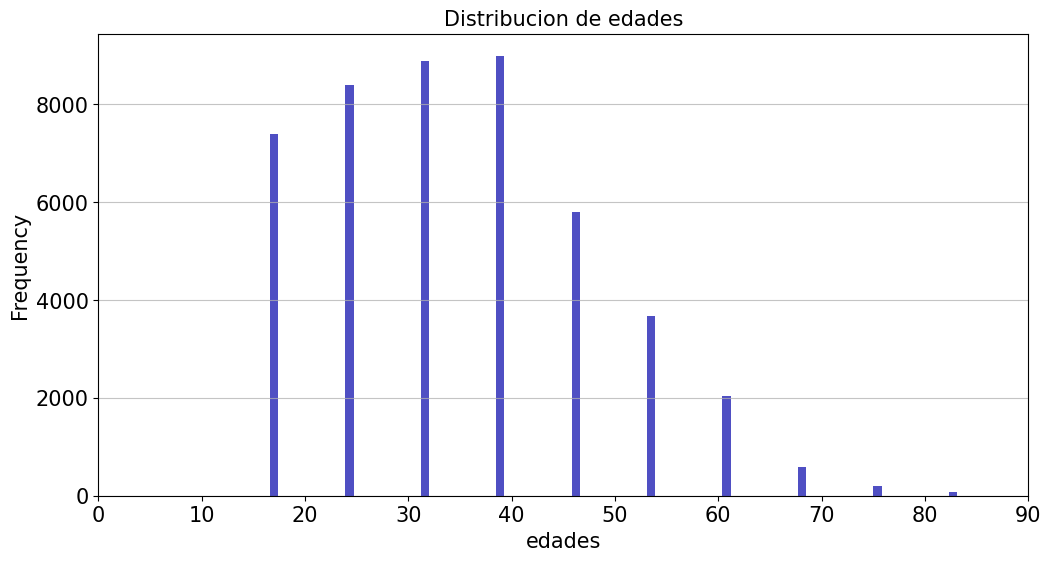

In [73]:
plt.figure(figsize=[12,6])

plt.bar(bin_edges[:-1], hist, color='#0504aa',alpha=0.7) #, width = 0.5
plt.xlim(0, max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('edades',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribucion de edades',fontsize=15)
plt.show()

* _Parece que con la unificación por rangos se puede visualizar mucho mejor las propiedades del dataset_

## 4.8.- Distribución de clases de trabajo

<Axes: title={'center': 'Distribución clases de trabajos'}, ylabel='Ocurrencia'>

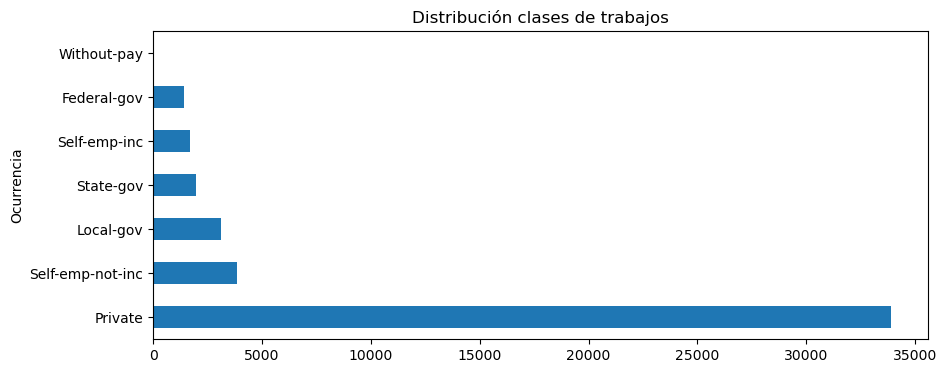

In [74]:
df1['workclass'].value_counts().plot(kind='barh',figsize=(10,4),title='Distribución clases de trabajos',ylabel='Ocurrencia')

* _La mayor cantidad de participantes se desempeña en el sector privado_
* _La muestra de este dataset si es coherente con el universo de trabajadores, el sector privedo es el que mas empleados contrata_

## 4.9.- Un campo extrano...'fnlwgt'

<Axes: ylabel='Frequency'>

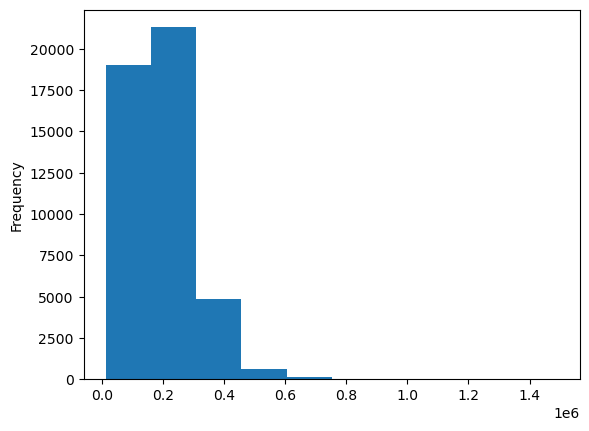

In [75]:
df1['fnlwgt'].plot(kind='hist')

* _Este campo no veo que aporte mucha información_

## 4.10.- Distribuciones de horas semanales - Análisis multivariado

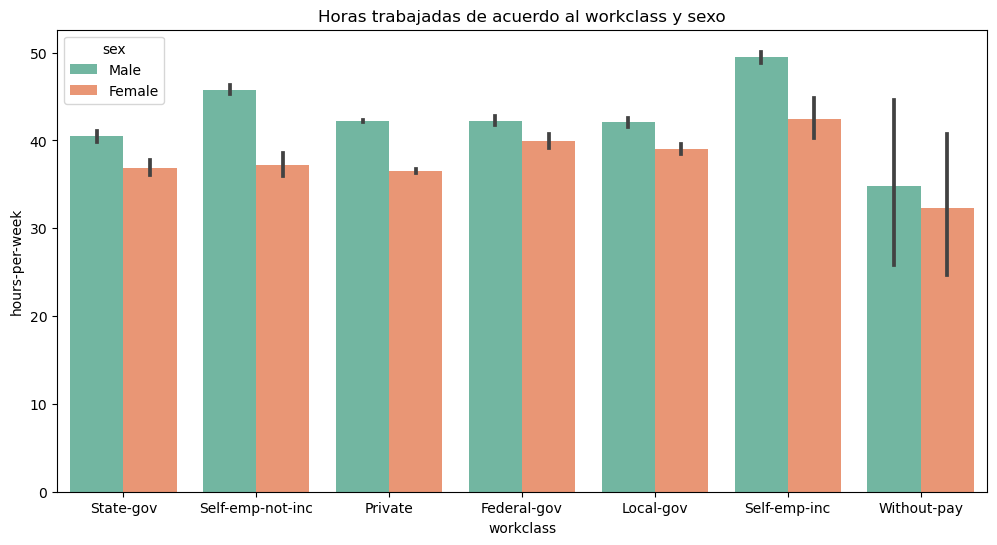

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(y='hours-per-week', x= 'workclass', hue='sex', data=df1, palette='Set2')
plt.title('Horas trabajadas de acuerdo al workclass y sexo')
plt.show()

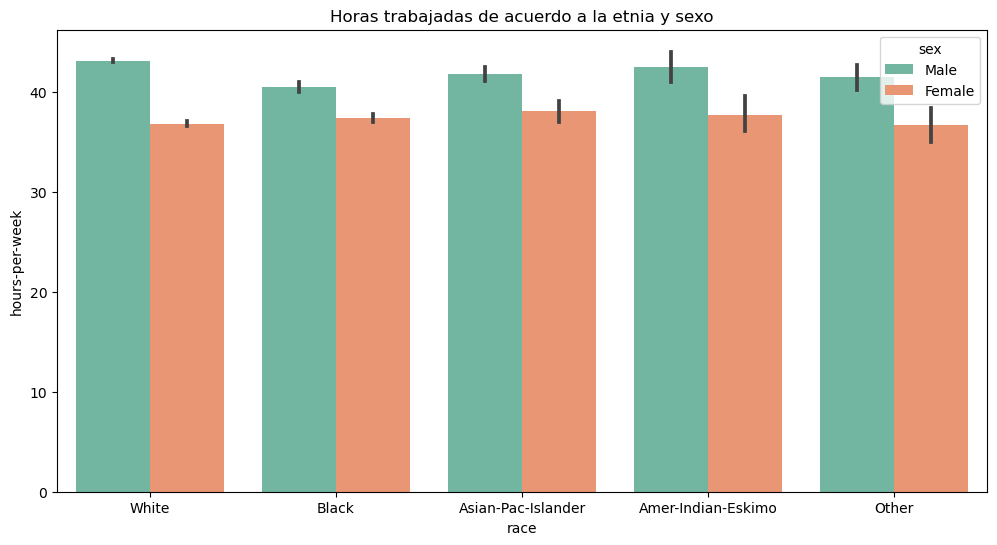

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(y='hours-per-week', x= 'race', hue='sex', data=df1, palette='Set2')
plt.title('Horas trabajadas de acuerdo a la etnia y sexo')
plt.show()

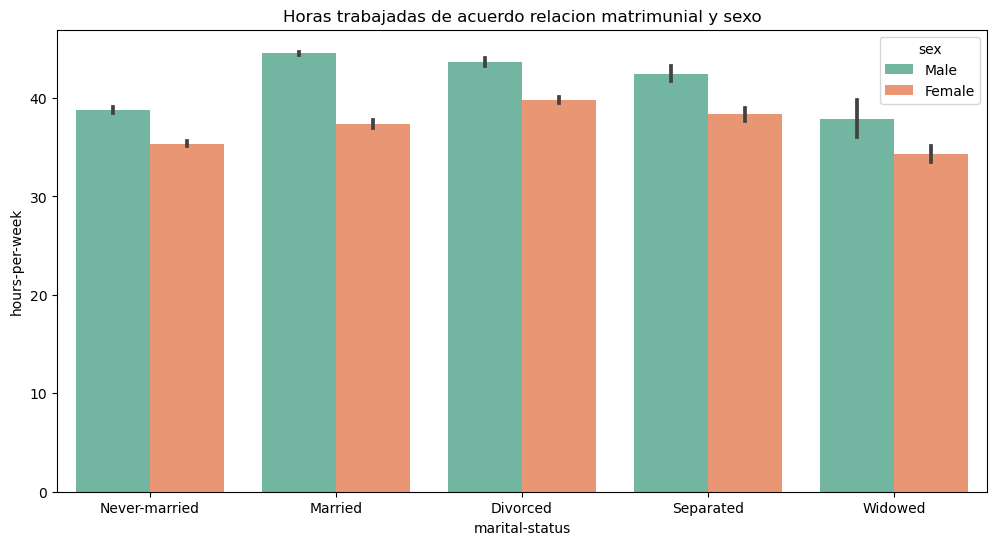

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(y='hours-per-week', x= 'marital-status', hue='sex', data=df1, palette='Set2')
plt.title('Horas trabajadas de acuerdo relacion matrimunial y sexo')
plt.show()

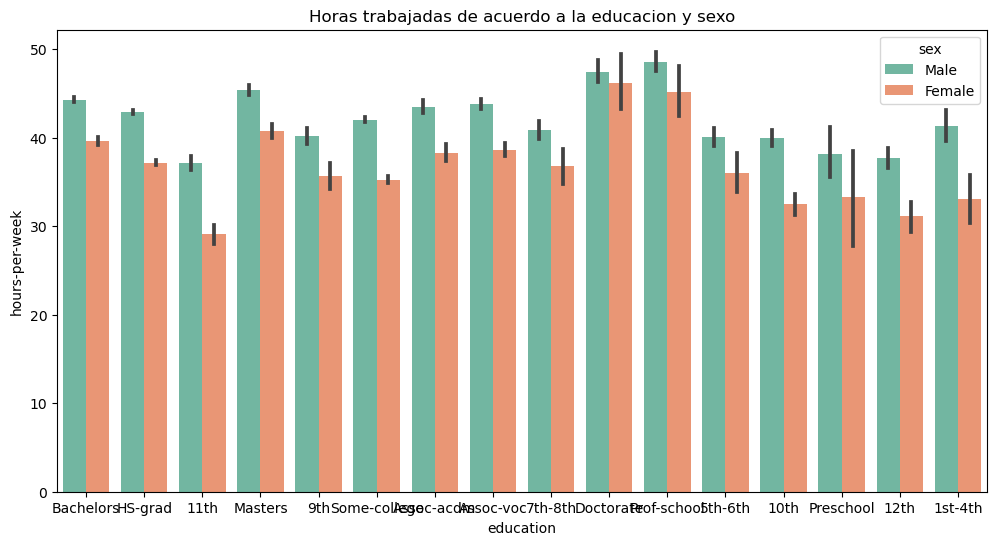

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(y='hours-per-week', x= 'education', hue='sex', data=df1, palette='Set2')
plt.title('Horas trabajadas de acuerdo a la educacion y sexo')
plt.show()

* _En principio parece que el sexo masculino trabaja más horas al día_
* _Esto aplica para todas las etnias, relaciones y para todos los niveles de educación_

In [80]:
## 4.11.- Distribución de la variable target

In [81]:
df1['income'].value_counts()

income
<=50K     23068
<=50K.    11543
>50K       7650
>50K.      3772
Name: count, dtype: int64

In [82]:
df1['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [83]:
df1['income'].nunique()

4

<Axes: ylabel='income'>

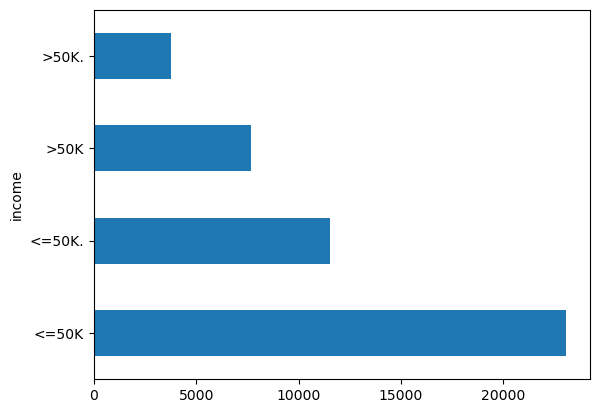

In [84]:
df1['income'].value_counts().plot(kind='barh')

* _Observamos que y tiene 4 categorías por el caracter punto '.' al final de algunas categorias_

In [85]:
#eliminación del caracter '.'
df1['income'] = df1['income'].apply(lambda x: '<=50K' if '<=50K.' in x else x)
df1['income'] = df1['income'].apply(lambda x: '>50K' if '>50K.' in x else x)

In [86]:
df1['income'].nunique()

2

In [87]:
df1['income'].unique()

array(['<=50K', '>50K'], dtype=object)

<Axes: ylabel='income'>

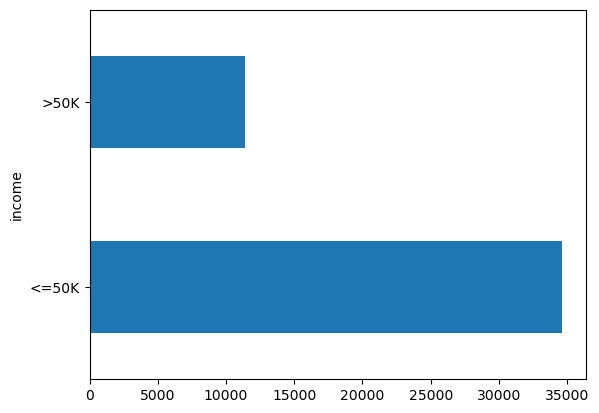

In [88]:
df1['income'].value_counts().plot(kind='barh')

## 4.12.- Distribución comparada con la variable target

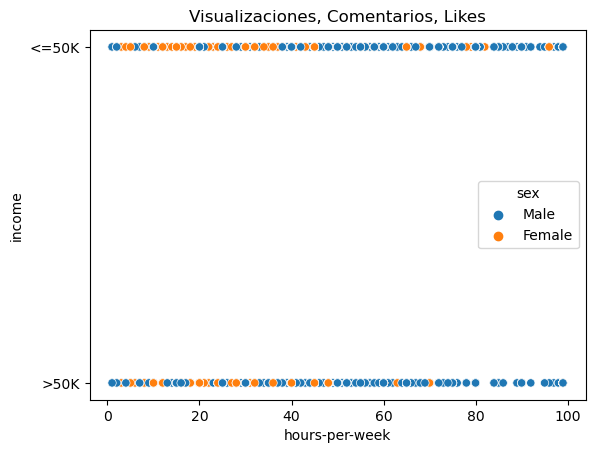

In [89]:
ax = sns.scatterplot(data=df1, x='hours-per-week', y='income',hue='sex')
ax.grid(False)
ax.set_title('Visualizaciones, Comentarios, Likes')
plt.show()

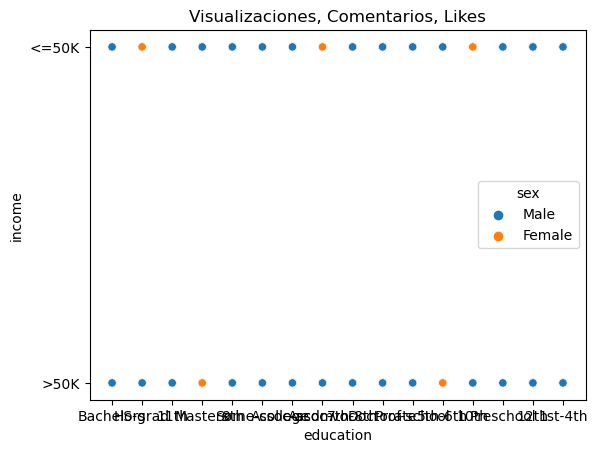

In [90]:
ax = sns.scatterplot(data=df1, x='education', y='income',hue='sex')
ax.grid(False)
ax.set_title('Visualizaciones, Comentarios, Likes')
plt.show()

* _El color azúl es mas preponderante producto del segso del dataset_
* _Pero se puede verificar el hecho que en generar el sexo Femenino trabaja menos horas_
* _En ese rango de cantidad de horas semanales se ven igualados los ingresos_
* _En general predomina el sexo masculino para sueldos altos_

# 5.- Data wrangling


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46033 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             46033 non-null  int64 
 1   workclass       46033 non-null  object
 2   fnlwgt          46033 non-null  int64 
 3   education       46033 non-null  object
 4   marital-status  46033 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    46033 non-null  object
 7   race            46033 non-null  object
 8   sex             46033 non-null  object
 9   hours-per-week  46033 non-null  int64 
 10  native-country  46033 non-null  object
 11  income          46033 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.6+ MB


## 5.1.- Reviso que campos tienen NaN y su cantidad

In [92]:
df1.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [93]:
df1.describe(include='all').T

count unique             top   freq           mean  \
age             46033.0    NaN             NaN    NaN      38.556601   
workclass         46033      7         Private  33906            NaN   
fnlwgt          46033.0    NaN             NaN    NaN  189805.122803   
education         46033     16         HS-grad  14972            NaN   
marital-status    46033      5         Married  22066            NaN   
occupation        46033     14  Prof-specialty   6172            NaN   
relationship      46033      6         Husband  19005            NaN   
race              46033      5           White  39444            NaN   
sex               46033      2            Male  31114            NaN   
hours-per-week  46033.0    NaN             NaN    NaN      40.948407   
native-country    46033     42   United-States  41547            NaN   
income            46033      2           <=50K  34611            NaN   

                          std      min       25%       50%       75%  \
age                 13.204268     17.0      28.0      37.0      47.0   
workclass                 NaN      NaN       NaN       NaN       NaN   
fnlwgt          105474.732488  13492.0  117606.0  178353.0  237865.0   
education                 NaN      NaN       NaN       NaN       NaN   
marital-status            NaN      NaN       NaN       NaN       NaN   
occupation                NaN      NaN       NaN       NaN       NaN   
relationship              NaN      NaN       NaN       NaN       NaN   
race                      NaN      NaN       NaN       NaN       NaN   
sex                       NaN      NaN       NaN       NaN       NaN   
hours-per-week      12.011069      1.0      40.0      40.0      45.0   
native-country            NaN      NaN       NaN       NaN       NaN   
income                    NaN      NaN       NaN       NaN       NaN   

                      max  
age                  90.0  
workclass             NaN  
fnlwgt          1490400.0  
education             NaN  
marital-status        NaN  
occupation            NaN  
relationship          NaN  
race                  NaN  
sex                   NaN  
hours-per-week       99.0  
native-country        NaN  
income                NaN

In [94]:
df1.head()

age         workclass  fnlwgt  education marital-status         occupation  \
0   39         State-gov   77516  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc   83311  Bachelors        Married    Exec-managerial   
2   38           Private  215646    HS-grad       Divorced  Handlers-cleaners   
3   53           Private  234721       11th        Married  Handlers-cleaners   
4   28           Private  338409  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country income  
0  Not-in-family  White    Male              40  United-States  <=50K  
1        Husband  White    Male              13  United-States  <=50K  
2  Not-in-family  White    Male              40  United-States  <=50K  
3        Husband  Black    Male              40  United-States  <=50K  
4           Wife  Black  Female              40           Cuba  <=50K

## 5.1.- Análisis de OUTLIERS para los campos numéricos

<Axes: >

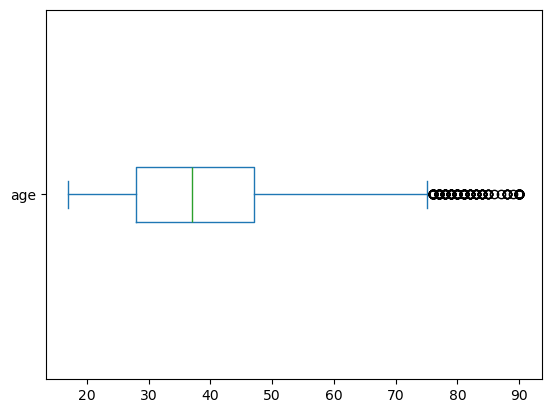

In [95]:
df1['age'].plot(kind='box',vert=False)

In [96]:
q4_edad = np.percentile(df1['age'],95)
q1_edad = np.percentile(df1['age'],5)
print('Analisis intercuartil para edad')
print(f'percentile q4 es:', q4_edad)
print(f'percentile q1 es:', q1_edad)

Analisis intercuartil para edad
percentile q4 es: 62.0
percentile q1 es: 20.0


In [97]:
df1['age'][df1['age'] > q4_edad].count()

2166

* _tenemos 2166 registros con personas que estan con edades superiores al cuartil 95 (cola superior)_
* _Esto podría indicar un problema social respecto a la clase pasiva???..._
* _Se debería eliminar? - Son 2000 registros de los cuales tienen 11 categorías asociadas..._
* _Propongo eliminarlos pensando en que realmente me interesan predecir ingresos anuales a los indivíduos que se encuentren en edad activa_
* _Esta podría pasar a ser una condición para el ingreso de nuevos datos al algoritmo_

In [98]:
q3_edad = np.percentile(df1['age'],75)
q1_edad = np.percentile(df1['age'],5)
IQR = q3_edad -q1_edad
min = q1_edad - 1.5*IQR
max = q3_edad + 1.5*IQR
print(f'percentile min es:', min)
print(f'percentile max es:', max)

percentile min es: -20.5
percentile max es: 87.5


In [99]:
#indice de registros con edades superiores a las 75 años
outliers_edad = df1.loc[df1['age'] > 75]
outliers_edad.head()

age         workclass  fnlwgt     education marital-status  \
74    79           Private  124744  Some-college        Married   
100   76           Private  124191       Masters        Married   
222   90           Private   51744       HS-grad  Never-married   
316   77  Self-emp-not-inc  138714  Some-college        Married   
324   76  Self-emp-not-inc  174309       Masters        Married   

          occupation    relationship   race   sex  hours-per-week  \
74    Prof-specialty  Other-relative  White  Male              20   
100  Exec-managerial         Husband  White  Male              40   
222    Other-service   Not-in-family  Black  Male              40   
316            Sales         Husband  White  Male              40   
324     Craft-repair         Husband  White  Male              10   

    native-country income  
74   United-States  <=50K  
100  United-States   >50K  
222  United-States  <=50K  
316  United-States  <=50K  
324  United-States  <=50K

In [100]:
df1.drop(outliers_edad.index,inplace=True)

In [101]:
df1.shape

(45759, 12)

In [102]:
df1.loc[df1['age'] >75]

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, income]
Index: []

<Axes: >

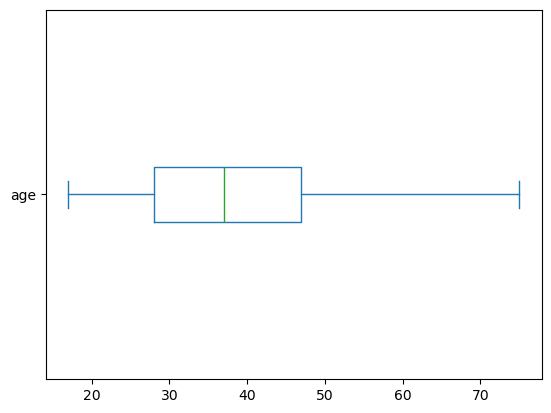

In [103]:
df1['age'].plot(kind='box',vert=False)

* _El límite MAX me dio múy elevado, superior a los 80...tome la determinación de fijarlo en 75 años_

<Axes: >

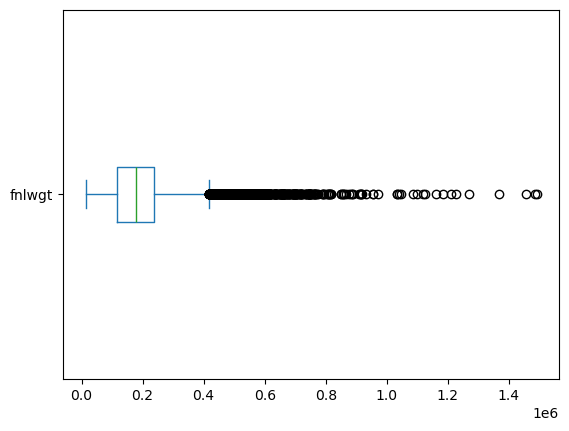

In [104]:
df1['fnlwgt'].plot(kind='box',vert=False)

In [105]:
q4_fnlwgt = np.percentile(df1['fnlwgt'],95)
q1_fnlwgt = np.percentile(df1['fnlwgt'],5)
print('Analisis intercuartil para fnlwgt')
print(f'percentile q4 es:', q4_fnlwgt)
print(f'percentile q1 es:', q1_fnlwgt)

Analisis intercuartil para fnlwgt
percentile q4 es: 379673.0
percentile q1 es: 40101.0


* _Sigo con el mismo indicio...Este campo no se que información puede brindar...es candidato a eliminarse del dataset..._

In [106]:
#Elimino el campo
df1 = df1.drop('fnlwgt',axis=1)
df1.head()

age         workclass  education marital-status         occupation  \
0   39         State-gov  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2   38           Private    HS-grad       Divorced  Handlers-cleaners   
3   53           Private       11th        Married  Handlers-cleaners   
4   28           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country income  
0  Not-in-family  White    Male              40  United-States  <=50K  
1        Husband  White    Male              13  United-States  <=50K  
2  Not-in-family  White    Male              40  United-States  <=50K  
3        Husband  Black    Male              40  United-States  <=50K  
4           Wife  Black  Female              40           Cuba  <=50K

<Axes: >

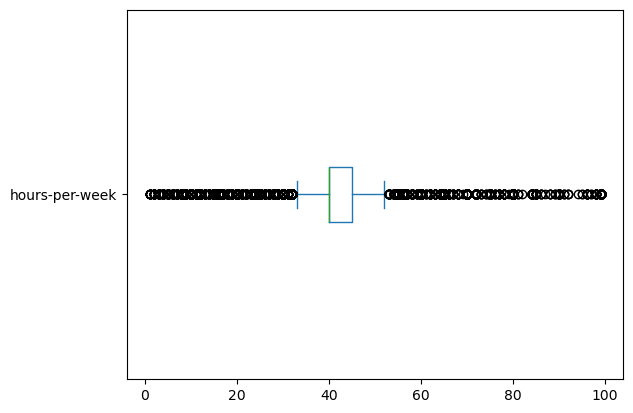

In [107]:
df1['hours-per-week'].plot(kind='box',vert=False)

In [108]:
q4_horas = np.percentile(df1['hours-per-week'],95)
q1_horas = np.percentile(df1['hours-per-week'],5)
print('Analisis intercuartil para Horas trabajadas por semana')
print(f'percentile q4 es:', q4_horas)
print(f'percentile q1 es:', q1_horas)

Analisis intercuartil para Horas trabajadas por semana
percentile q4 es: 60.0
percentile q1 es: 20.0


In [109]:
df1['hours-per-week'][df1['hours-per-week'].isin([q1_horas,q4_horas])].count()

3708

In [110]:
df1['hours-per-week'].mean()

41.021350991061865

* _Una distribución rara...parece que hay un trabajo para individuo..._
* _Lo voy a dejar así, espero que el algoritmo pueda encontrar una relación a esta variabilidad_
* _Quizas debería indicarse cantidad de días por semana...quizas hay personas que trabajan solo los fines de semana y eso reduce la cantida de horas..._
* _Quizas para hacer conjeturas y suposiciones pero parece que esta limitado el nivel de información del dataset para seguir con una descripción más profunda al respecto_
* _El rango es de 20 a 60 horas y la mediana (50% de las muestras) es 41 horas y la media muestral esta en 40 horas_

In [111]:
df1.shape

(45759, 11)

In [112]:
df1.describe(include='all').T

count unique             top   freq       mean        std  \
age             45759.0    NaN             NaN    NaN  38.301667  12.819327   
workclass         45759      7         Private  33756        NaN        NaN   
education         45759     16         HS-grad  14888        NaN        NaN   
marital-status    45759      5         Married  21930        NaN        NaN   
occupation        45759     14  Prof-specialty   6135        NaN        NaN   
relationship      45759      6         Husband  18882        NaN        NaN   
race              45759      5           White  39195        NaN        NaN   
sex               45759      2            Male  30926        NaN        NaN   
hours-per-week  45759.0    NaN             NaN    NaN  41.021351  11.946775   
native-country    45759     42   United-States  41298        NaN        NaN   
income            45759      2           <=50K  34386        NaN        NaN   

                 min   25%   50%   75%   max  
age             17.0  28.0  37.0  47.0  75.0  
workclass        NaN   NaN   NaN   NaN   NaN  
education        NaN   NaN   NaN   NaN   NaN  
marital-status   NaN   NaN   NaN   NaN   NaN  
occupation       NaN   NaN   NaN   NaN   NaN  
relationship     NaN   NaN   NaN   NaN   NaN  
race             NaN   NaN   NaN   NaN   NaN  
sex              NaN   NaN   NaN   NaN   NaN  
hours-per-week   1.0  40.0  40.0  45.0  99.0  
native-country   NaN   NaN   NaN   NaN   NaN  
income           NaN   NaN   NaN   NaN   NaN

# 5.2.- Algunos análisis y procesamientos adicionales

from sklearn.preprocessing import OrdinalEncoder
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas.testing

#Clasificacion
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#regresión
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
df_x = df1.drop('income',axis=1)
df_y = df1['income']

In [114]:
df_x.head()

age         workclass  education marital-status         occupation  \
0   39         State-gov  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2   38           Private    HS-grad       Divorced  Handlers-cleaners   
3   53           Private       11th        Married  Handlers-cleaners   
4   28           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country  
0  Not-in-family  White    Male              40  United-States  
1        Husband  White    Male              13  United-States  
2  Not-in-family  White    Male              40  United-States  
3        Husband  Black    Male              40  United-States  
4           Wife  Black  Female              40           Cuba

In [115]:
df_y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [116]:
df_y.value_counts()

income
<=50K    34386
>50K     11373
Name: count, dtype: int64

In [117]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45759 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45759 non-null  int64 
 1   workclass       45759 non-null  object
 2   education       45759 non-null  object
 3   marital-status  45759 non-null  object
 4   occupation      45759 non-null  object
 5   relationship    45759 non-null  object
 6   race            45759 non-null  object
 7   sex             45759 non-null  object
 8   hours-per-week  45759 non-null  int64 
 9   native-country  45759 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.8+ MB


In [118]:
print(df_x.shape,df_y.shape)

(45759, 10) (45759,)


In [119]:
columnas = df_x.select_dtypes(exclude=['int64']).columns
for i in columnas:
    categorias = df_x[i].unique()
    print(f'-------- \n Campo: {i} \n Categorias: {categorias} \n---------\n')

-------- 
 Campo: workclass 
 Categorias: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay'] 
---------

-------- 
 Campo: education 
 Categorias: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th'] 
---------

-------- 
 Campo: marital-status 
 Categorias: ['Never-married' 'Married' 'Divorced' 'Separated' 'Widowed'] 
---------

-------- 
 Campo: occupation 
 Categorias: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 
---------

-------- 
 Campo: relationship 
 Categorias: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 
---------

-------- 
 Campo: race 
 Categorias: ['White' 'Black' 'Asian-Pac-Islander' 'A

* _son todas categóricas - debería convenrtirlas a numericas para mejorar el tratamiento ML_

## 5.3.- Voy a realizar unas pruebas con el algorimo de encoder

In [120]:
from sklearn.preprocessing import OrdinalEncoder

In [121]:
encoder = OrdinalEncoder()

In [122]:
encoder.fit(df_x)

OrdinalEncoder()

In [123]:
#Excluyo las que ya son numéricas así solo trabajo con categóricas (object)
columnas = df_x.select_dtypes(exclude=['int64']).columns
for i in columnas:
    nuevo_campo = 'encoder_'+ i
    df_x[nuevo_campo] = encoder.fit_transform(df_x[[i]])


In [124]:
df_x.head()

age         workclass  education marital-status         occupation  \
0   39         State-gov  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2   38           Private    HS-grad       Divorced  Handlers-cleaners   
3   53           Private       11th        Married  Handlers-cleaners   
4   28           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country  \
0  Not-in-family  White    Male              40  United-States   
1        Husband  White    Male              13  United-States   
2  Not-in-family  White    Male              40  United-States   
3        Husband  Black    Male              40  United-States   
4           Wife  Black  Female              40           Cuba   

   encoder_workclass  encoder_education  encoder_marital-status  \
0                5.0                9.0                     2.0   
1                4.0                9.0                     1.0   
2                2.0               11.0                     0.0   
3                2.0                1.0                     1.0   
4                2.0                9.0                     1.0   

   encoder_occupation  encoder_relationship  encoder_race  encoder_sex  \
0                 0.0                   1.0           4.0          1.0   
1                 3.0                   0.0           4.0          1.0   
2                 5.0                   1.0           4.0          1.0   
3                 5.0                   0.0           2.0          1.0   
4                 9.0                   5.0           2.0          0.0   

   encoder_native-country  
0                    39.0  
1                    39.0  
2                    39.0  
3                    39.0  
4                     5.0

In [125]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45759 entries, 0 to 48841
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     45759 non-null  int64  
 1   workclass               45759 non-null  object 
 2   education               45759 non-null  object 
 3   marital-status          45759 non-null  object 
 4   occupation              45759 non-null  object 
 5   relationship            45759 non-null  object 
 6   race                    45759 non-null  object 
 7   sex                     45759 non-null  object 
 8   hours-per-week          45759 non-null  int64  
 9   native-country          45759 non-null  object 
 10  encoder_workclass       45759 non-null  float64
 11  encoder_education       45759 non-null  float64
 12  encoder_marital-status  45759 non-null  float64
 13  encoder_occupation      45759 non-null  float64
 14  encoder_relationship    45759 non-null  flo

In [126]:
df_x.describe().T

count       mean        std   min   25%   50%   75%  \
age                     45759.0  38.301667  12.819327  17.0  28.0  37.0  47.0   
hours-per-week          45759.0  41.021351  11.946775   1.0  40.0  40.0  45.0   
encoder_workclass       45759.0   2.203588   0.957205   0.0   2.0   2.0   2.0   
encoder_education       45759.0  10.314801   3.811923   0.0   9.0  11.0  12.0   
encoder_marital-status  45759.0   1.327302   0.847771   0.0   1.0   1.0   2.0   
encoder_occupation      45759.0   5.979545   4.025029   0.0   2.0   6.0   9.0   
encoder_relationship    45759.0   1.414782   1.598667   0.0   0.0   1.0   3.0   
encoder_race            45759.0   3.671431   0.842340   0.0   4.0   4.0   4.0   
encoder_sex             45759.0   0.675845   0.468063   0.0   0.0   1.0   1.0   
encoder_native-country  45759.0  36.957997   7.281159   0.0  39.0  39.0  39.0   

                         max  
age                     75.0  
hours-per-week          99.0  
encoder_workclass        6.0  
encoder_education       15.0  
encoder_marital-status   4.0  
encoder_occupation      13.0  
encoder_relationship     5.0  
encoder_race             4.0  
encoder_sex              1.0  
encoder_native-country  41.0

* _los campos numéricos 'age', hours-per-week' son de rango amplio...tendría que armar categorías para reducir la dimensnalidad_

In [127]:
columnas_num = df_x.select_dtypes(exclude=['object']).columns
df_x_num = df_x[columnas_num]
df_x_num.head()

age  hours-per-week  encoder_workclass  encoder_education  \
0   39              40                5.0                9.0   
1   50              13                4.0                9.0   
2   38              40                2.0               11.0   
3   53              40                2.0                1.0   
4   28              40                2.0                9.0   

   encoder_marital-status  encoder_occupation  encoder_relationship  \
0                     2.0                 0.0                   1.0   
1                     1.0                 3.0                   0.0   
2                     0.0                 5.0                   1.0   
3                     1.0                 5.0                   0.0   
4                     1.0                 9.0                   5.0   

   encoder_race  encoder_sex  encoder_native-country  
0           4.0          1.0                    39.0  
1           4.0          1.0                    39.0  
2           4.0          1.0                    39.0  
3           2.0          1.0                    39.0  
4           2.0          0.0                     5.0

<Axes: >

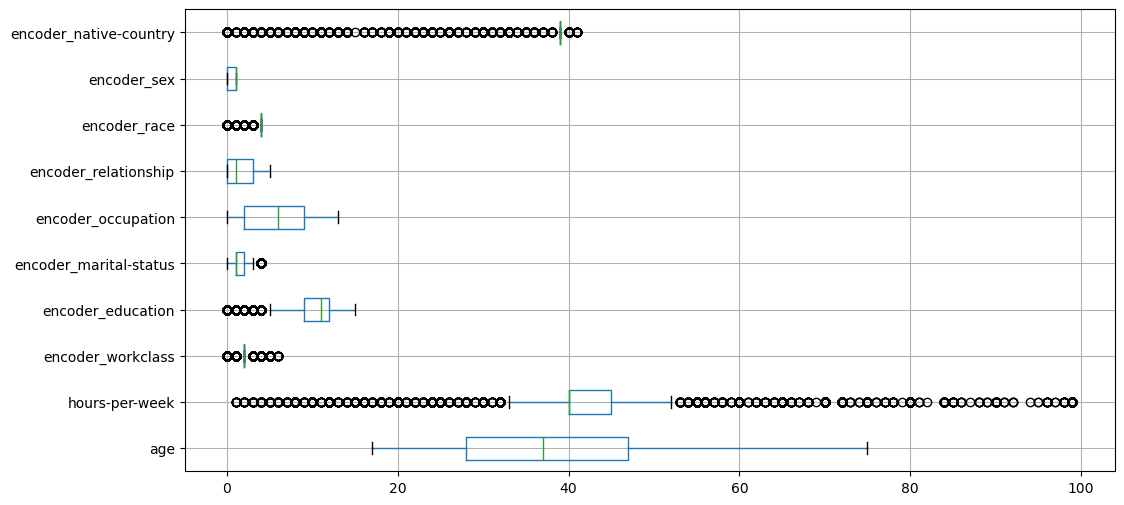

In [128]:
df_x_num.boxplot(figsize=(12,6),vert=False)

In [129]:
df_x_num.columns

Index(['age', 'hours-per-week', 'encoder_workclass', 'encoder_education',
       'encoder_marital-status', 'encoder_occupation', 'encoder_relationship',
       'encoder_race', 'encoder_sex', 'encoder_native-country'],
      dtype='object')

In [130]:
df_x_num.nunique()

age                       59
hours-per-week            96
encoder_workclass          7
encoder_education         16
encoder_marital-status     5
encoder_occupation        14
encoder_relationship       6
encoder_race               5
encoder_sex                2
encoder_native-country    42
dtype: int64

In [131]:
df_x_num['encoder_native-country'].value_counts()

encoder_native-country
39.0    41298
26.0      902
0.0       553
30.0      281
11.0      193
33.0      174
2.0       162
19.0      147
8.0       146
5.0       131
9.0       116
3.0       113
23.0      103
35.0       99
22.0       99
6.0        96
24.0       89
13.0       86
40.0       83
4.0        82
31.0       79
14.0       69
32.0       61
20.0       56
36.0       55
12.0       48
27.0       47
29.0       45
7.0        42
21.0       36
10.0       36
37.0       29
17.0       28
1.0        26
38.0       26
41.0       23
28.0       22
25.0       21
34.0       20
16.0       19
18.0       17
15.0        1
Name: count, dtype: int64

In [132]:
df_x_num.shape

(45759, 10)

* _en una primera aproximación vemos que no es necesario realizar una normalización. (0 - 100)_

## 5.1.- Análisis de correlación

In [133]:
#Pearson Correlation
corr_matrix = df_x_num.corr()

print(corr_matrix)

                             age  hours-per-week  encoder_workclass  \
age                     1.000000        0.125847           0.083227   
hours-per-week          0.125847        1.000000           0.052650   
encoder_workclass       0.083227        0.052650           1.000000   
encoder_education      -0.000415        0.058817           0.018258   
encoder_marital-status -0.213521       -0.173520          -0.033398   
encoder_occupation     -0.004843        0.015844           0.017599   
encoder_relationship   -0.249624       -0.262581          -0.064053   
encoder_race            0.024194        0.042932           0.046889   
encoder_sex             0.084028        0.231697           0.068817   
encoder_native-country -0.003550        0.001497           0.002415   

                        encoder_education  encoder_marital-status  \
age                             -0.000415               -0.213521   
hours-per-week                   0.058817               -0.173520   
encoder_wor

<Axes: >

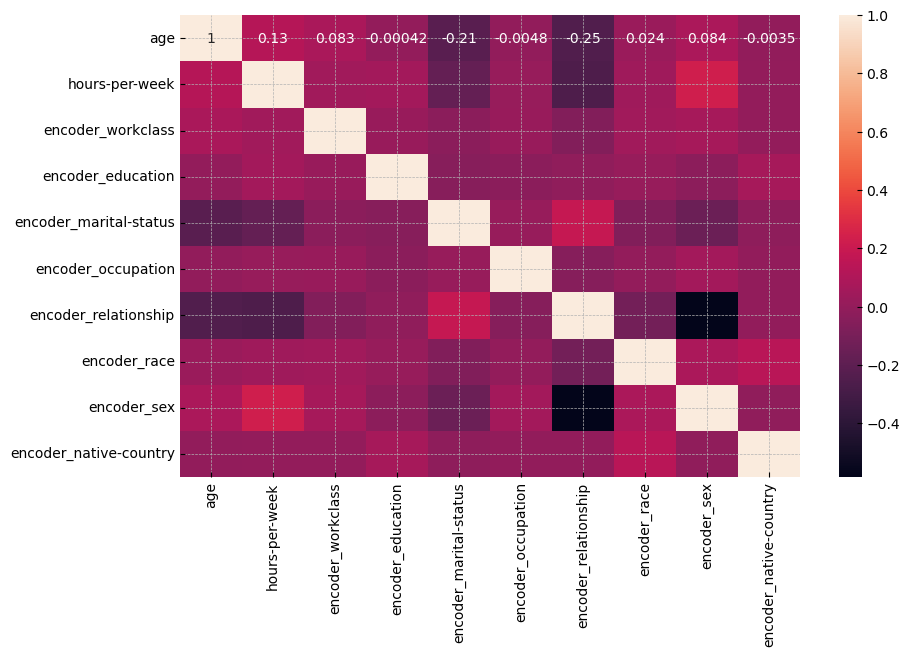

In [134]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(df_x_num.corr(), annot=True, ax=ax)
#, cmap=sns.cubehelix_palette(as_cmap=True)

### como las variables no son compatibles con distribuciones normales, pruebo la correlación con un método que se ajusta mejor y no se ve afectado por lo outliers

<Axes: >

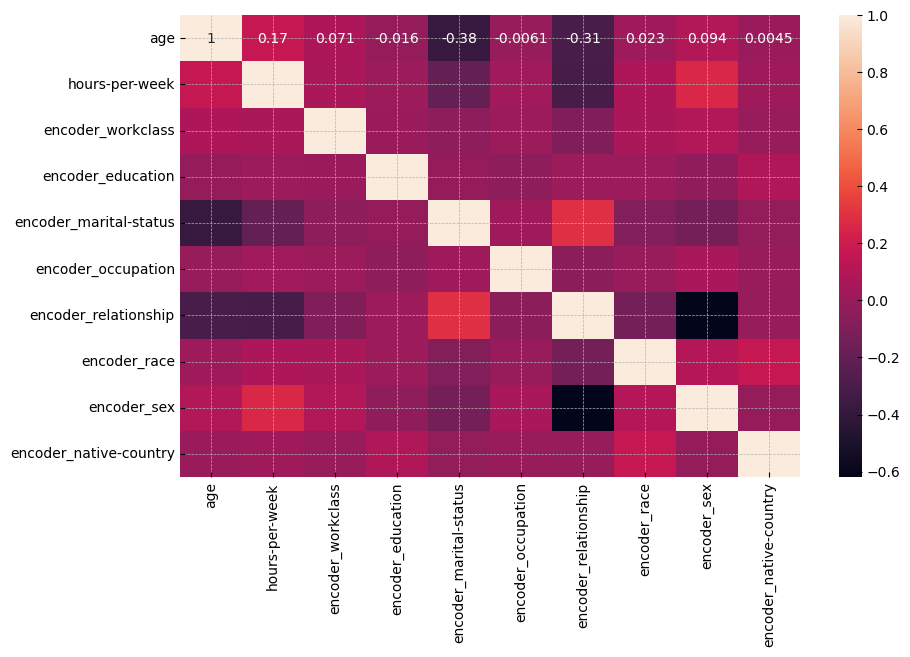

In [135]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_x_num.corr(method='spearman'), annot=True, ax=ax)

### Veo una correlación 'fuerte' [> 0,62]  entre 'sex' y 'relatioship'
### Parecería que tiene más sentido contar con un datos asociado a 'sex' en el dataset que 'relationship'
### Pero sex es dicotómica...[0,1]...no es correcta esta relación

Text(0.5, 1.0, 'Sex vs Relationship')

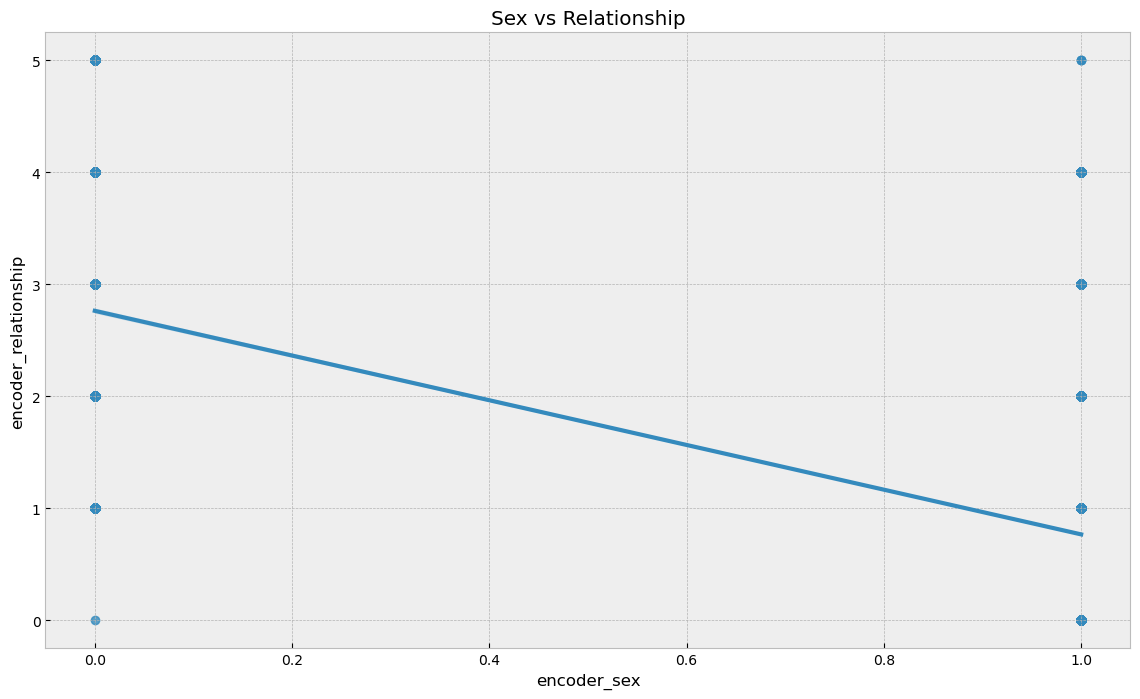

In [136]:
plt.figure(figsize=(14,8))
sns.regplot(x='encoder_sex', y='encoder_relationship', data=df_x_num)
plt.title('Sex vs Relationship')

In [137]:
corr_matrix_sp = df_x_num.corr(method='spearman')
sorted_mat = corr_matrix_sp.unstack().sort_values()
sorted_mat

encoder_sex             encoder_relationship     -0.619535
encoder_relationship    encoder_sex              -0.619535
encoder_marital-status  age                      -0.382571
age                     encoder_marital-status   -0.382571
hours-per-week          encoder_relationship     -0.311203
                                                    ...   
encoder_education       encoder_education         1.000000
encoder_workclass       encoder_workclass         1.000000
hours-per-week          hours-per-week            1.000000
encoder_sex             encoder_sex               1.000000
encoder_native-country  encoder_native-country    1.000000
Length: 100, dtype: float64

<Axes: >

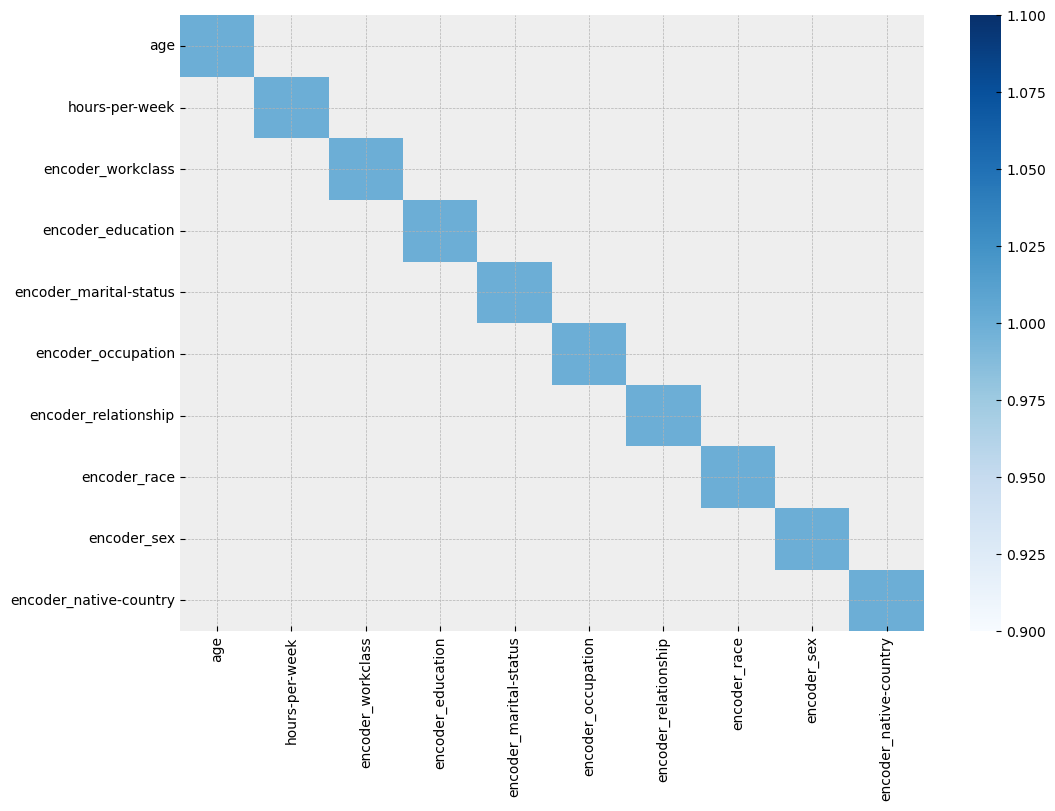

In [138]:
corr_alta = corr_matrix_sp[corr_matrix_sp>=.6]

plt.figure(figsize=(12,8))
sns.heatmap(corr_alta, cmap="Blues")

In [139]:
def coefcorr(x: pd.DataFrame, thres: float):
    #generate corr
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

coefcorr(df_x_num, 0.5)

Variable_1   Variable_2  corr_value
1  encoder_relationship  encoder_sex   -0.619535

C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

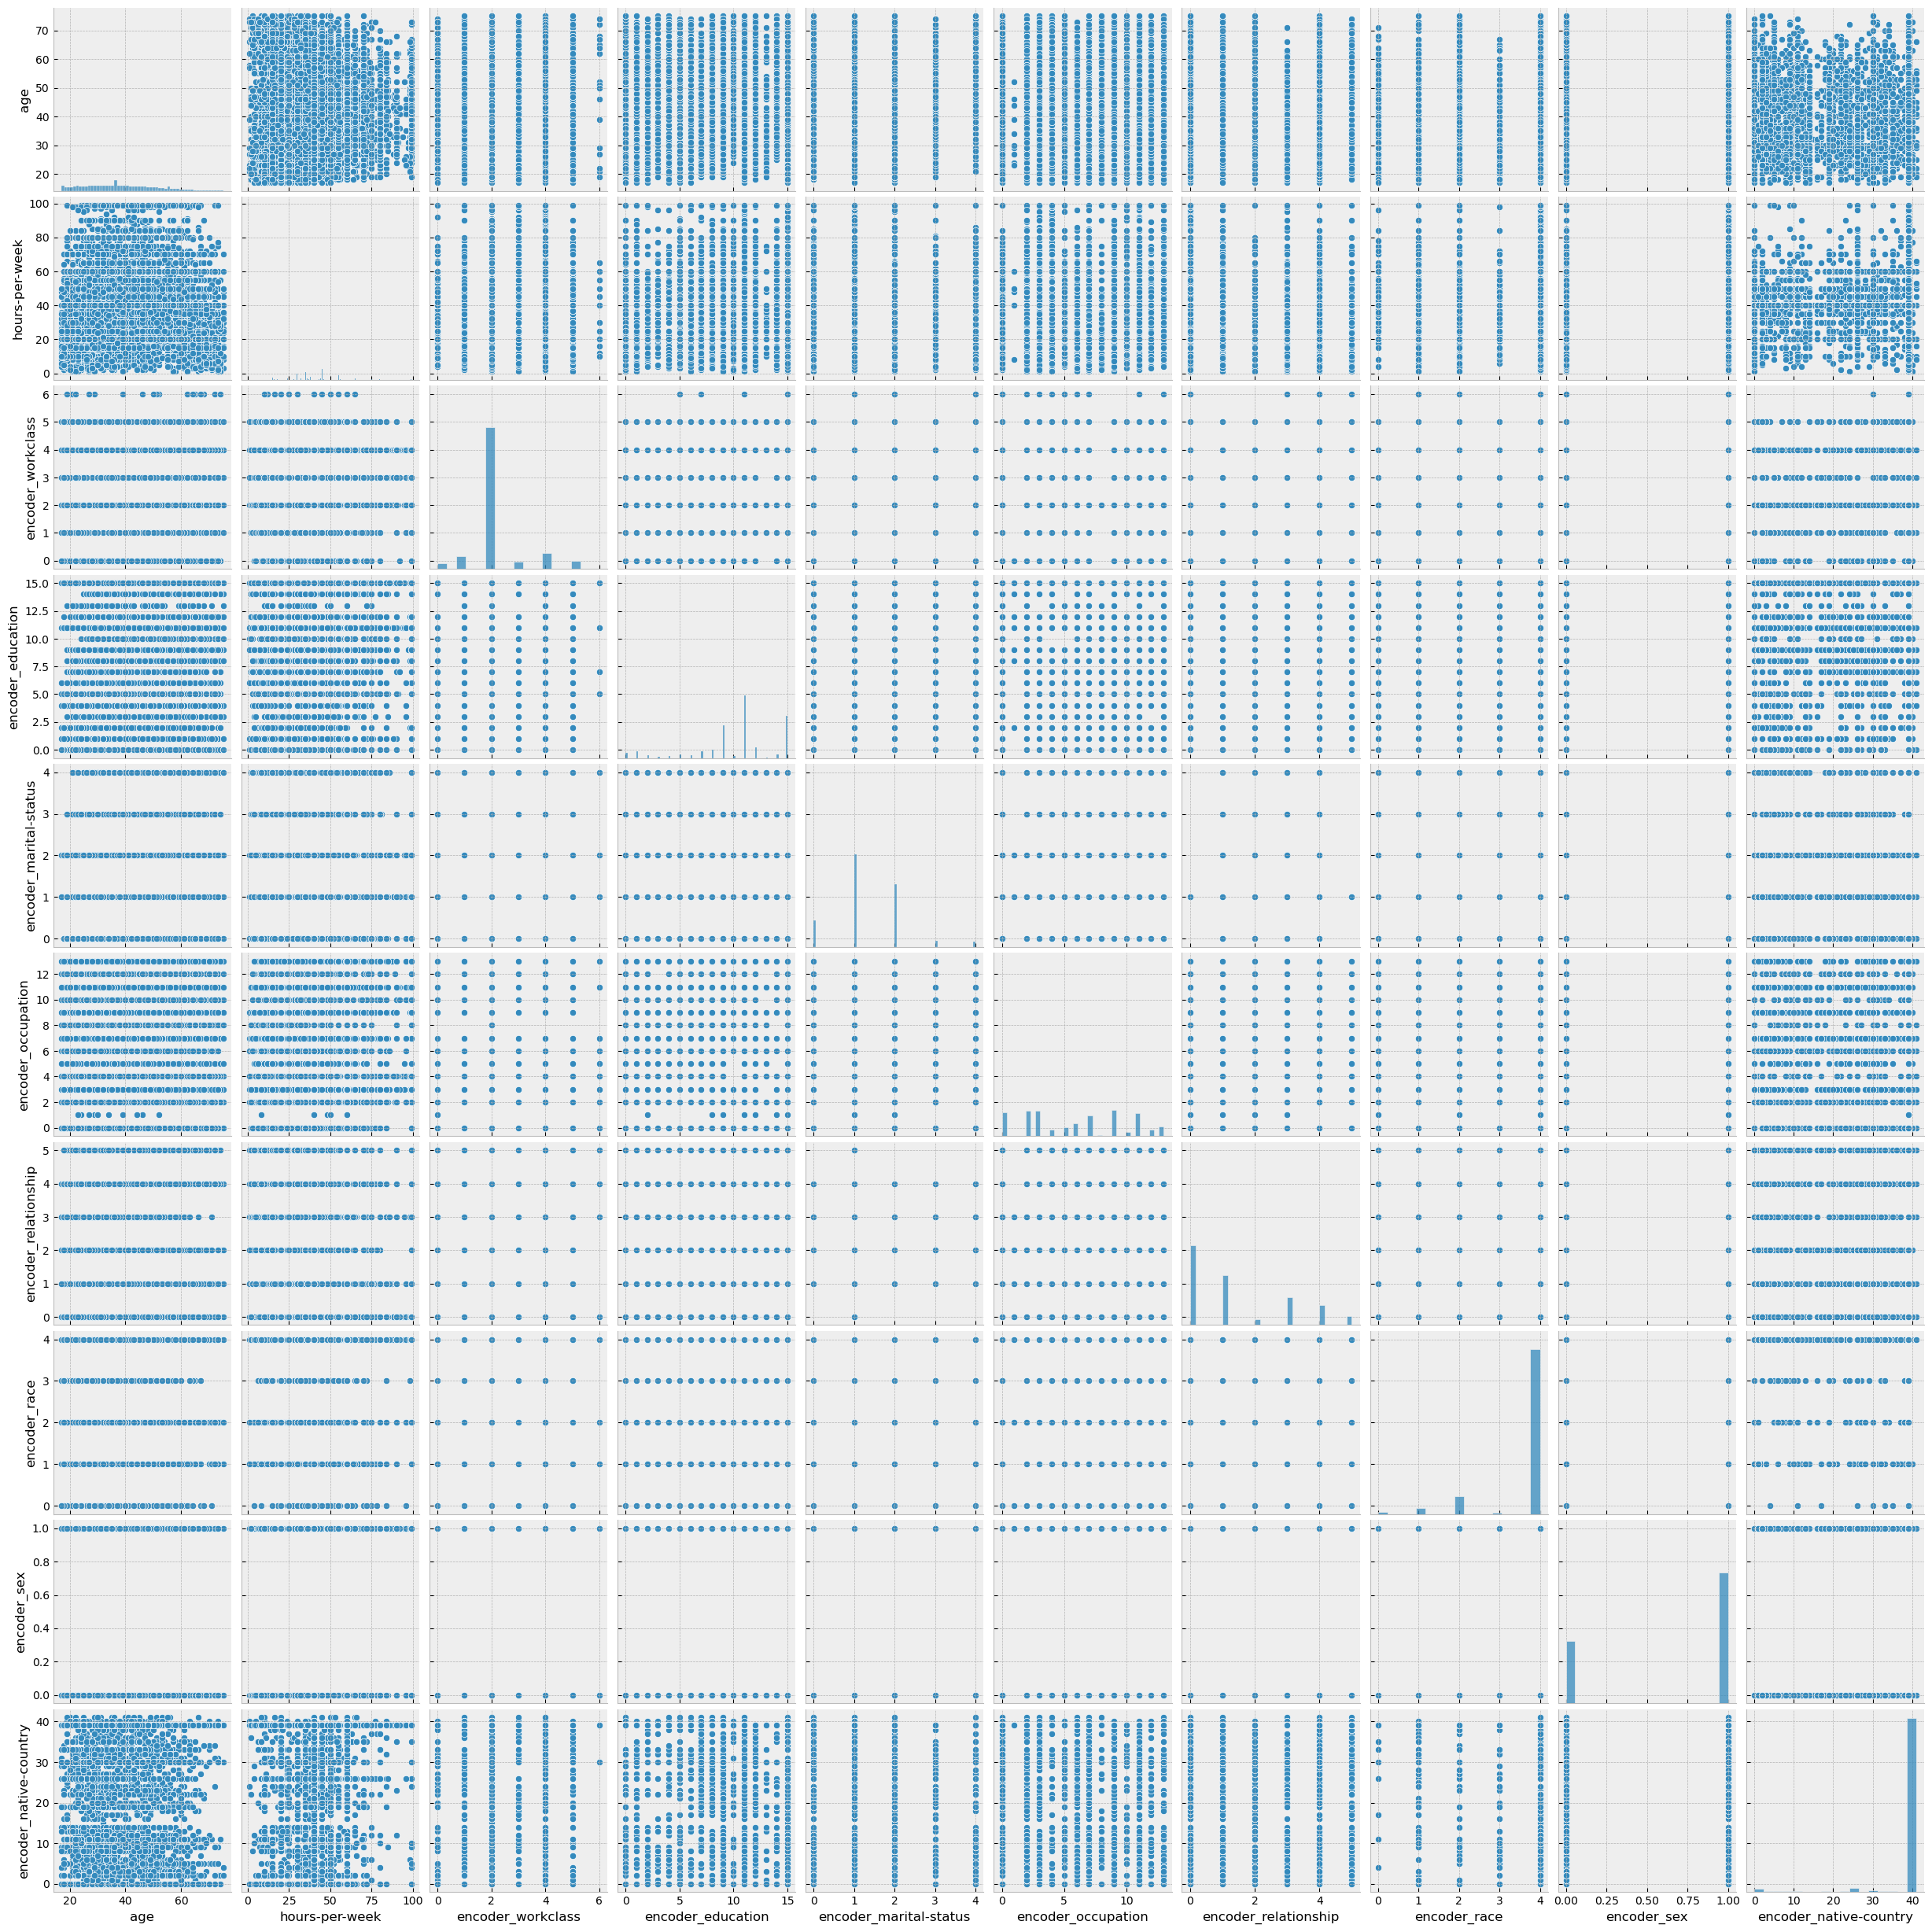

In [140]:
#plt.figure(figsize=(14,8))
#plt.figure(dpi=120)
sns.pairplot(data=df_x)
plt.show()

C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 1400x1400 with 0 Axes>

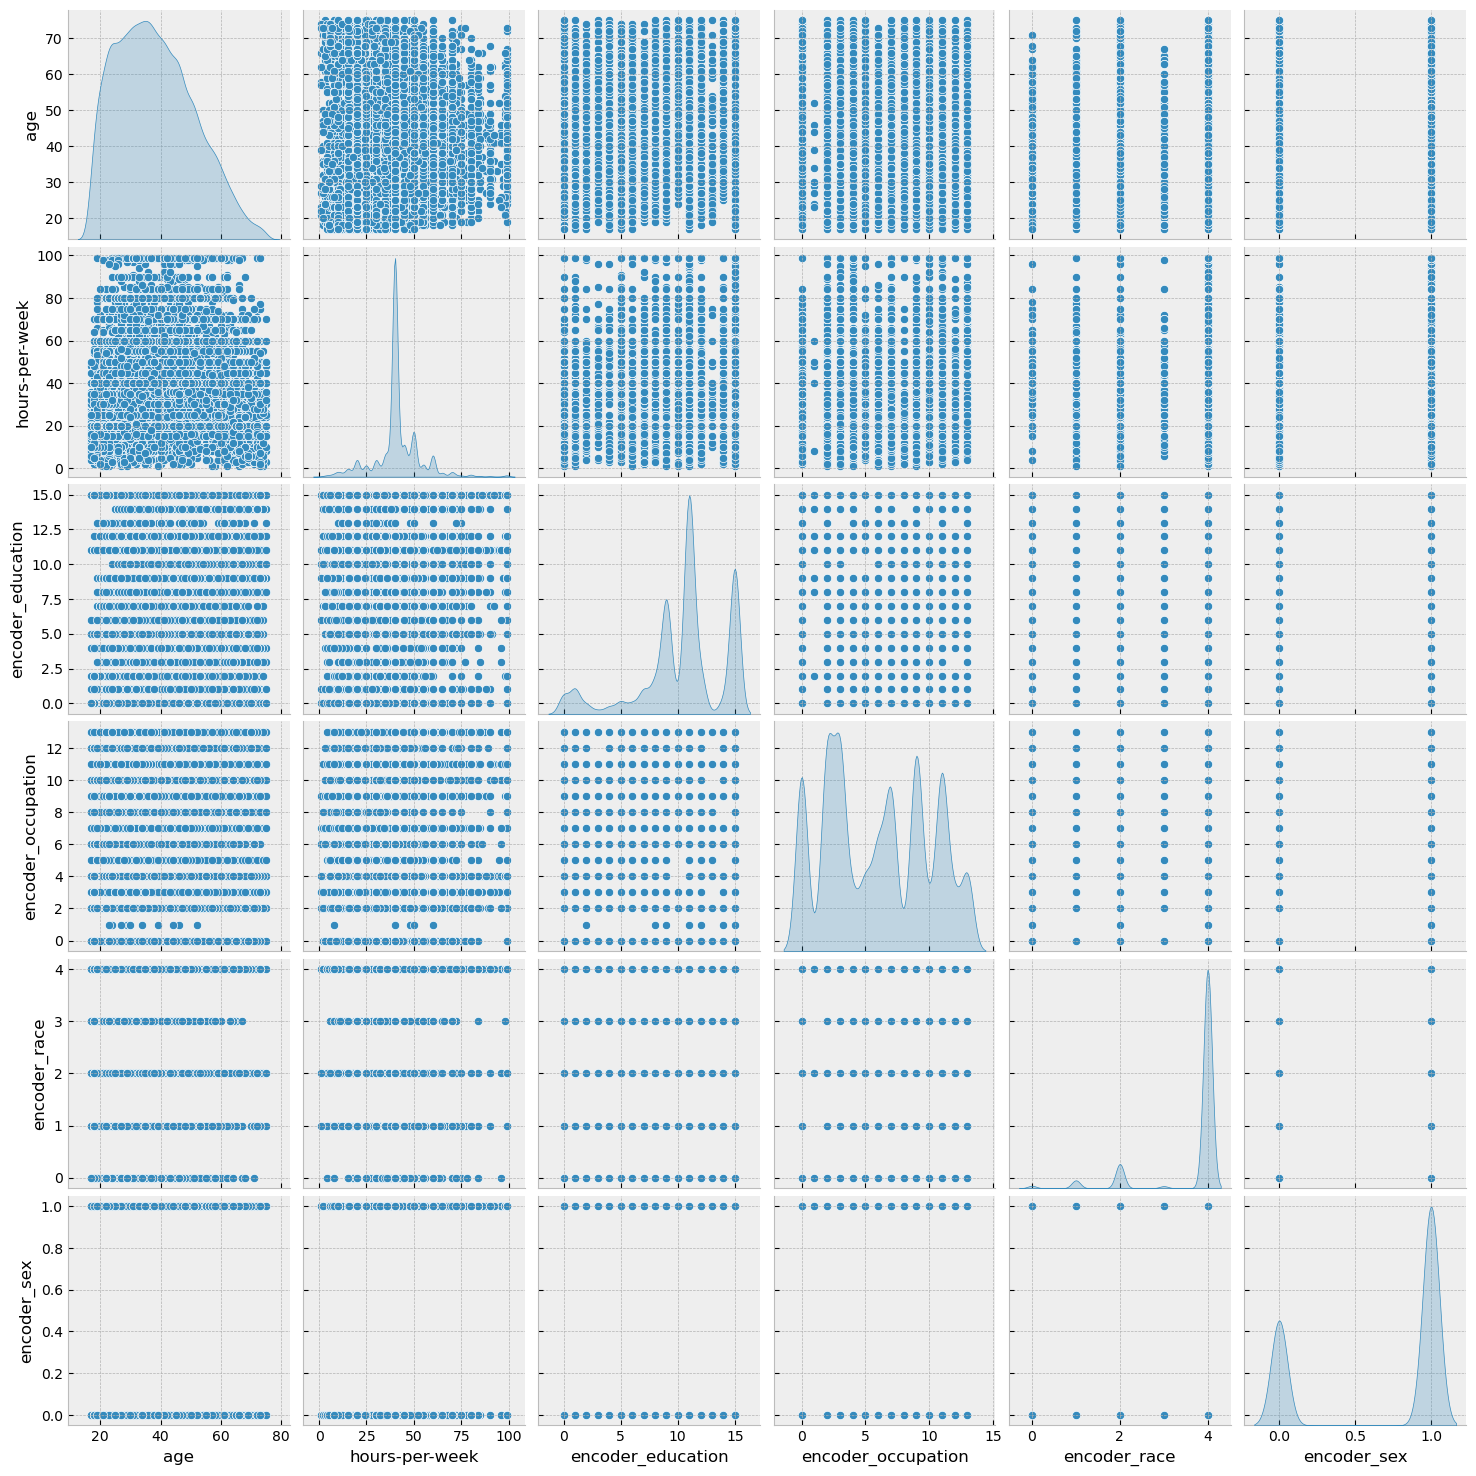

In [141]:
plt.figure(figsize=(14, 14))

g = sns.pairplot(df_x_num[['age', 'hours-per-week', 'encoder_education', 'encoder_occupation', 'encoder_race', 'encoder_sex']], diag_kind='kde');

In [142]:
for i in df_x_num.columns:
    # Calcular la media
    media = df_x_num[i].mean()

    # Calcular la mediana
    mediana = df_x_num[i].median()

    # Calcular la moda
    moda = df_x_num[i].mode().values[0]

    # Calcular la asimetría
    asimetria = df_x_num[i].skew()

    # Calcular cantidad de valores:
    valores = df_x_num[i].nunique()
    # Imprimir los resultados
    print(f'columna: {i}')
    print(f'cantidad de valores:', valores)
    print("Media:", media)
    print("Mediana:", mediana)
    print("Moda:", moda)
    print("Asimetría:", asimetria)
    

columna: age
cantidad de valores: 59
Media: 38.30166743154352
Mediana: 37.0
Moda: 36
Asimetría: 0.41870100227859547
columna: hours-per-week
cantidad de valores: 96
Media: 41.021350991061865
Mediana: 40.0
Moda: 40
Asimetría: 0.36007983470130384
columna: encoder_workclass
cantidad de valores: 7
Media: 2.203588365130357
Mediana: 2.0
Moda: 2.0
Asimetría: 1.1534509277796747
columna: encoder_education
cantidad de valores: 16
Media: 10.314801459822112
Mediana: 11.0
Moda: 11.0
Asimetría: -0.9458613104534703
columna: encoder_marital-status
cantidad de valores: 5
Media: 1.3273017329924168
Mediana: 1.0
Moda: 1.0
Asimetría: 0.6694773811527217
columna: encoder_occupation
cantidad de valores: 14
Media: 5.9795450075395005
Mediana: 6.0
Moda: 9.0
Asimetría: 0.1028506439326591
columna: encoder_relationship
cantidad de valores: 6
Media: 1.4147817915601302
Mediana: 1.0
Moda: 0.0
Asimetría: 0.8275109017218587
columna: encoder_race
cantidad de valores: 5
Media: 3.671430756791014
Mediana: 4.0
Moda: 4.0
Asime

## 5.2.- Analizamos categorias para reducir estados (agrupamiento)

In [143]:
import scipy
scipy.stats.describe(df_x['age'])

DescribeResult(nobs=45759, minmax=(17, 75), mean=38.30166743154352, variance=164.33514976124337, skewness=0.4186872769519419, kurtosis=-0.5311871562585733)

C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


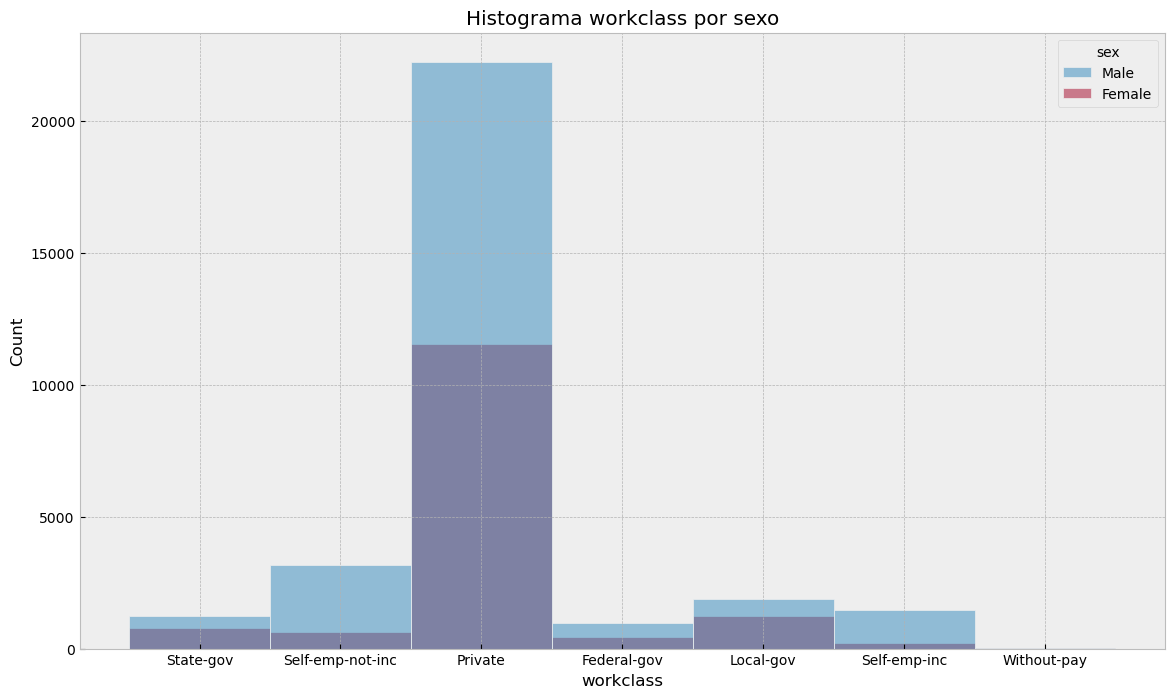

In [144]:
plt.figure(figsize=(14,8))
sns.histplot(data=df_x,x='workclass',hue='sex')
plt.title('Histograma workclass por sexo')
plt.show()

C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x800 with 0 Axes>

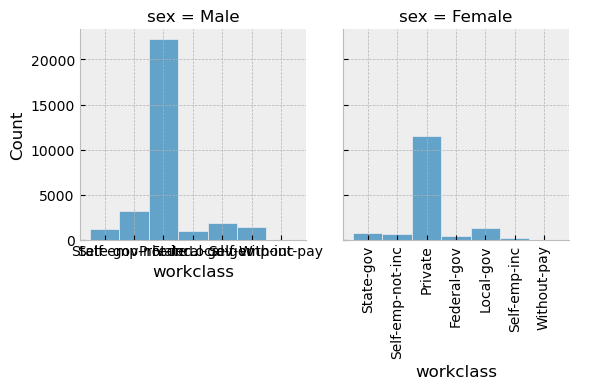

In [145]:
plt.figure(figsize=(14,8))

g = sns.FacetGrid(df_x,col = 'sex',margin_titles=True)

g.map(sns.histplot,'workclass')
g.add_legend()
#rotate x-axis labels
plt.xticks(rotation='vertical')
plt.show()

C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


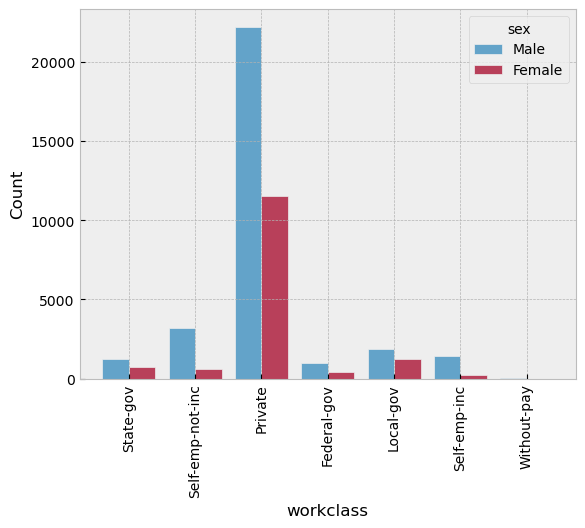

In [146]:
sns.histplot(data=df_x, x="workclass", hue="sex", multiple="dodge", shrink=.8)
plt.xticks(rotation='vertical')
plt.show()

<Figure size 1400x800 with 0 Axes>

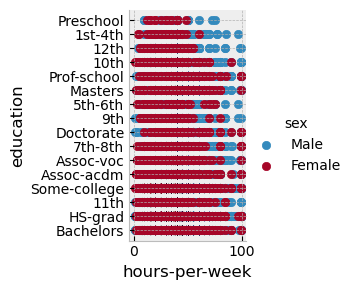

In [147]:
plt.figure(figsize=(14,8))
sns.FacetGrid(df_x,hue = 'sex').map(plt.scatter,'hours-per-week','education').add_legend();
plt.show()

# 6.- Normalización
## https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/

### StandardScaler
### MinMaxScaler
### RobustScaler()

In [148]:
from sklearn import preprocessing

In [149]:
df1.head()

age         workclass  education marital-status         occupation  \
0   39         State-gov  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2   38           Private    HS-grad       Divorced  Handlers-cleaners   
3   53           Private       11th        Married  Handlers-cleaners   
4   28           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country income  
0  Not-in-family  White    Male              40  United-States  <=50K  
1        Husband  White    Male              13  United-States  <=50K  
2  Not-in-family  White    Male              40  United-States  <=50K  
3        Husband  Black    Male              40  United-States  <=50K  
4           Wife  Black  Female              40           Cuba  <=50K

## 6.1.- Categorías en las variables 'AGE'

### Con los campos de 'age' y 'hours-per-week' tambien resulta conveniente reducir las categorías.
### Se propone utilizar el cálculo de bins numpy para histograma y evaluar una reducción de categorias

In [150]:
df1['age'].nunique()

59

In [151]:
q4_edad = np.percentile(df1['age'],95)
q1_edad = np.percentile(df1['age'],5)
print('Analisis intercuartil para edad')
print(f'percentile q4 es:', q4_edad)
print(f'percentile q1 es:', q1_edad)

Analisis intercuartil para edad
percentile q4 es: 61.0
percentile q1 es: 20.0


In [152]:
hist,bin_edges = np.histogram(df1['age'])
print(hist)
print(bin_edges)

[4996 7072 7500 7454 5559 5472 3660 2441 1138  467]
[17.  22.8 28.6 34.4 40.2 46.  51.8 57.6 63.4 69.2 75. ]


TypeError: 'numpy.float64' object is not callable

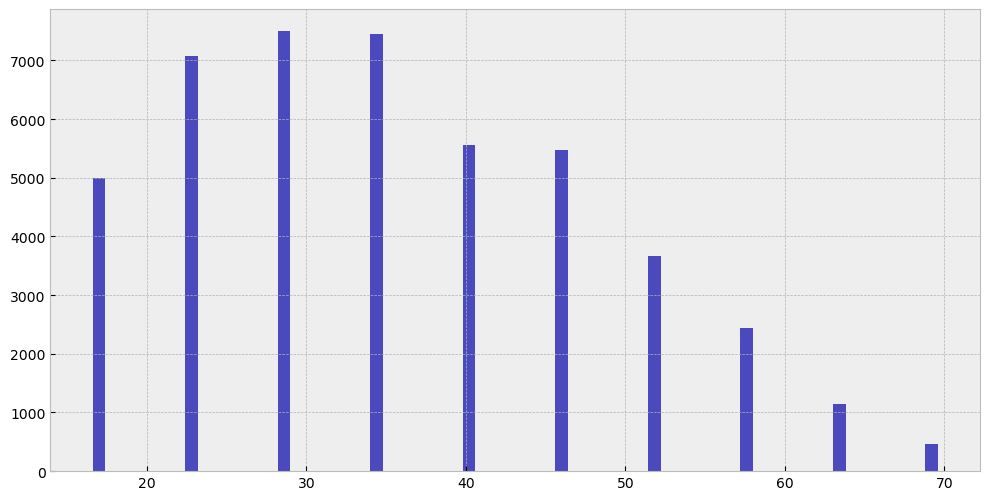

In [154]:
plt.figure(figsize=[12,6])

plt.bar(bin_edges[:-1], hist, color='#0504aa',alpha=0.7) #, width = 0.5
plt.xlim(0, max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('edades',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribucion de edades',fontsize=15)
plt.show()

In [155]:
df1.loc[df1['age'] < bin_edges[1],'encoder_age'] = bin_edges[1]
df1.loc[df1['age'].between(bin_edges[1],bin_edges[2]),'encoder_age'] = bin_edges[2]
df1.loc[df1['age'].between(bin_edges[2],bin_edges[3]),'encoder_age'] = bin_edges[3]
df1.loc[df1['age'].between(bin_edges[3],bin_edges[4]),'encoder_age'] = bin_edges[4]
df1.loc[df1['age'].between(bin_edges[4],bin_edges[5]),'encoder_age'] = bin_edges[5]
df1.loc[df1['age'].between(bin_edges[5],bin_edges[6]),'encoder_age'] = bin_edges[6]
df1.loc[df1['age'].between(bin_edges[6],bin_edges[7]),'encoder_age'] = bin_edges[7]
df1.loc[df1['age'].between(bin_edges[7],bin_edges[8]),'encoder_age'] = bin_edges[8]
df1.loc[df1['age'] > bin_edges[8],'encoder_age'] = bin_edges[9]


In [156]:
df1.head()

age         workclass  education marital-status         occupation  \
0   39         State-gov  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2   38           Private    HS-grad       Divorced  Handlers-cleaners   
3   53           Private       11th        Married  Handlers-cleaners   
4   28           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country income  \
0  Not-in-family  White    Male              40  United-States  <=50K   
1        Husband  White    Male              13  United-States  <=50K   
2  Not-in-family  White    Male              40  United-States  <=50K   
3        Husband  Black    Male              40  United-States  <=50K   
4           Wife  Black  Female              40           Cuba  <=50K   

   encoder_age  
0         40.2  
1         51.8  
2         40.2  
3         57.6  
4         28.6

In [157]:
df1['encoder_age'].nunique()

9

## 6.2.- Categorías en las variables 'AGE' 'HOURS-PER-WEEK'

In [158]:
df1['hours-per-week'].nunique()

96

In [159]:
hist,bin_hours = np.histogram(df1['hours-per-week'])
print(hist)
print(bin_hours)

[  754  2791  2948 25276  4548  5700  2584   664   295   199]
[ 1.  10.8 20.6 30.4 40.2 50.  59.8 69.6 79.4 89.2 99. ]


TypeError: 'numpy.float64' object is not callable

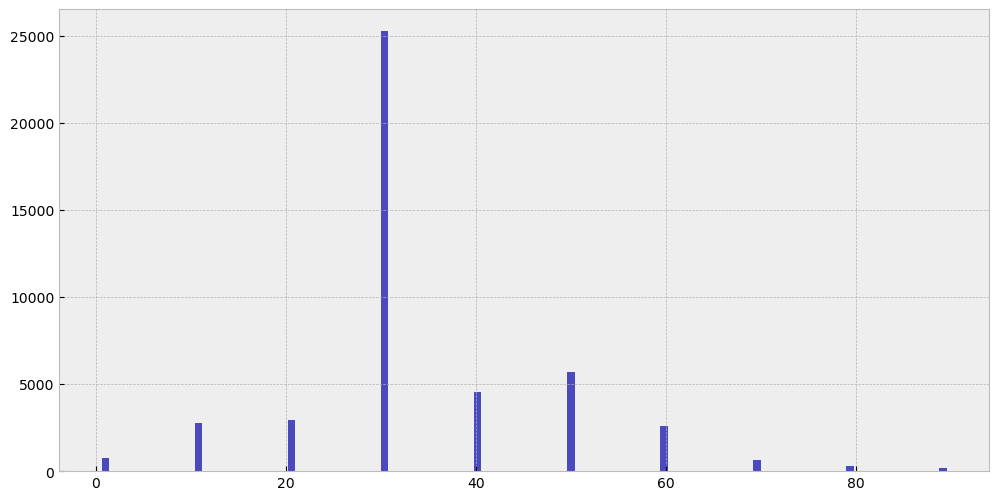

In [160]:
plt.figure(figsize=[12,6])

plt.bar(bin_hours[:-1], hist, color='#0504aa',alpha=0.7) #, width = 0.5
plt.xlim(0, max(bin_hours))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('edades',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribucion de horas semanales',fontsize=15)
plt.show()

In [161]:
df1.loc[df1['hours-per-week'] < bin_hours[1],'encoder_hpw'] = bin_hours[1]
df1.loc[df1['hours-per-week'].between(bin_hours[1],bin_hours[2]),'encoder_hpw'] = bin_hours[2]
df1.loc[df1['hours-per-week'].between(bin_hours[2],bin_hours[3]),'encoder_hpw'] = bin_hours[3]
df1.loc[df1['hours-per-week'].between(bin_hours[3],bin_hours[4]),'encoder_hpw'] = bin_hours[4]
df1.loc[df1['hours-per-week'].between(bin_hours[4],bin_hours[5]),'encoder_hpw'] = bin_hours[5]
df1.loc[df1['hours-per-week'].between(bin_hours[5],bin_hours[6]),'encoder_hpw'] = bin_hours[6]
df1.loc[df1['hours-per-week'].between(bin_hours[6],bin_hours[7]),'encoder_hpw'] = bin_hours[7]
df1.loc[df1['hours-per-week'].between(bin_hours[7],bin_hours[8]),'encoder_hpw'] = bin_hours[8]
df1.loc[df1['hours-per-week'] > bin_hours[8],'encoder_hpw'] = bin_hours[9]


In [162]:
df1['encoder_hpw'].nunique()

9

In [163]:
df_final= df1.drop(['age','hours-per-week'],axis=1)

In [164]:
df_final.head()

workclass  education marital-status         occupation  \
0         State-gov  Bachelors  Never-married       Adm-clerical   
1  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2           Private    HS-grad       Divorced  Handlers-cleaners   
3           Private       11th        Married  Handlers-cleaners   
4           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex native-country income  encoder_age  \
0  Not-in-family  White    Male  United-States  <=50K         40.2   
1        Husband  White    Male  United-States  <=50K         51.8   
2  Not-in-family  White    Male  United-States  <=50K         40.2   
3        Husband  Black    Male  United-States  <=50K         57.6   
4           Wife  Black  Female           Cuba  <=50K         28.6   

   encoder_hpw  
0         40.2  
1         20.6  
2         40.2  
3         40.2  
4         40.2

* _Reduje las categorías de 'age' y 'hours-per-week' en 9 categorias_
* _utilice las agrupaciones que realiza el algoritmo de distribución de los histogramas_

## 6.3.- Paso los campos categóricos a numericos
* _Elijo que lo realice basado en un orden/criterio comenzando por '0'_

In [165]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(df_final)

OrdinalEncoder()

In [166]:
columnas = df_final.select_dtypes(exclude=['int64']).columns
for i in columnas:
    nuevo_campo = 'encoder_'+ i
    df_final[nuevo_campo] = encoder.fit_transform(df_final[[i]])

In [167]:
df_final.head()

workclass  education marital-status         occupation  \
0         State-gov  Bachelors  Never-married       Adm-clerical   
1  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2           Private    HS-grad       Divorced  Handlers-cleaners   
3           Private       11th        Married  Handlers-cleaners   
4           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex native-country income  encoder_age  ...  \
0  Not-in-family  White    Male  United-States  <=50K         40.2  ...   
1        Husband  White    Male  United-States  <=50K         51.8  ...   
2  Not-in-family  White    Male  United-States  <=50K         40.2  ...   
3        Husband  Black    Male  United-States  <=50K         57.6  ...   
4           Wife  Black  Female           Cuba  <=50K         28.6  ...   

   encoder_education  encoder_marital-status  encoder_occupation  \
0                9.0                     2.0                 0.0   
1                9.0                     1.0                 3.0   
2               11.0                     0.0                 5.0   
3                1.0                     1.0                 5.0   
4                9.0                     1.0                 9.0   

   encoder_relationship  encoder_race  encoder_sex  encoder_native-country  \
0                   1.0           4.0          1.0                    39.0   
1                   0.0           4.0          1.0                    39.0   
2                   1.0           4.0          1.0                    39.0   
3                   0.0           2.0          1.0                    39.0   
4                   5.0           2.0          0.0                     5.0   

   encoder_income  encoder_encoder_age  encoder_encoder_hpw  
0             0.0                  3.0                  3.0  
1             0.0                  5.0                  1.0  
2             0.0                  3.0                  3.0  
3             0.0                  6.0                  3.0  
4             0.0                  1.0                  3.0  

[5 rows x 22 columns]

In [168]:
print(df_final['encoder_income'].unique())
print(df_final['income'].unique())

[0. 1.]
['<=50K' '>50K']


In [169]:
df_final['encoder_income'].nunique()

2

In [170]:
df_final_num = df_final.select_dtypes(exclude=['object'])
df_final_num

encoder_age  encoder_hpw  encoder_workclass  encoder_education  \
0             40.2         40.2                5.0                9.0   
1             51.8         20.6                4.0                9.0   
2             40.2         40.2                2.0               11.0   
3             57.6         40.2                2.0                1.0   
4             28.6         40.2                2.0                9.0   
...            ...          ...                ...                ...   
48836         34.4         40.2                2.0                9.0   
48837         40.2         40.2                2.0                9.0   
48839         40.2         59.8                2.0                9.0   
48840         46.0         40.2                2.0                9.0   
48841         40.2         69.6                3.0                9.0   

       encoder_marital-status  encoder_occupation  encoder_relationship  \
0                         2.0                 0.0                   1.0   
1                         1.0                 3.0                   0.0   
2                         0.0                 5.0                   1.0   
3                         1.0                 5.0                   0.0   
4                         1.0                 9.0                   5.0   
...                       ...                 ...                   ...   
48836                     2.0                 9.0                   3.0   
48837                     0.0                 9.0                   1.0   
48839                     1.0                 9.0                   0.0   
48840                     0.0                 0.0                   3.0   
48841                     1.0                 3.0                   0.0   

       encoder_race  encoder_sex  encoder_native-country  encoder_income  \
0               4.0          1.0                    39.0             0.0   
1               4.0          1.0                    39.0             0.0   
2               4.0          1.0                    39.0             0.0   
3               2.0          1.0                    39.0             0.0   
4               2.0          0.0                     5.0             0.0   
...             ...          ...                     ...             ...   
48836           4.0          1.0                    39.0             0.0   
48837           4.0          0.0                    39.0             0.0   
48839           4.0          1.0                    39.0             0.0   
48840           1.0          1.0                    39.0             0.0   
48841           4.0          1.0                    39.0             1.0   

       encoder_encoder_age  encoder_encoder_hpw  
0                      3.0                  3.0  
1                      5.0                  1.0  
2                      3.0                  3.0  
3                      6.0                  3.0  
4                      1.0                  3.0  
...                    ...                  ...  
48836                  2.0                  3.0  
48837                  3.0                  3.0  
48839                  3.0                  5.0  
48840                  4.0                  3.0  
48841                  3.0                  6.0  

[45759 rows x 13 columns]

In [171]:
df_final_num.describe().T

count       mean        std   min   25%   50%   75%  \
encoder_age             45759.0  41.295129  12.679659  22.8  28.6  40.2  51.8   
encoder_hpw             45759.0  44.062261  13.541612  10.8  40.2  40.2  50.0   
encoder_workclass       45759.0   2.203588   0.957205   0.0   2.0   2.0   2.0   
encoder_education       45759.0  10.314801   3.811923   0.0   9.0  11.0  12.0   
encoder_marital-status  45759.0   1.327302   0.847771   0.0   1.0   1.0   2.0   
encoder_occupation      45759.0   5.979545   4.025029   0.0   2.0   6.0   9.0   
encoder_relationship    45759.0   1.414782   1.598667   0.0   0.0   1.0   3.0   
encoder_race            45759.0   3.671431   0.842340   0.0   4.0   4.0   4.0   
encoder_sex             45759.0   0.675845   0.468063   0.0   0.0   1.0   1.0   
encoder_native-country  45759.0  36.957997   7.281159   0.0  39.0  39.0  39.0   
encoder_income          45759.0   0.248541   0.432172   0.0   0.0   0.0   0.0   
encoder_encoder_age     45759.0   3.188815   2.186148   0.0   1.0   3.0   5.0   
encoder_encoder_hpw     45759.0   3.394108   1.381797   0.0   3.0   3.0   4.0   

                         max  
encoder_age             69.2  
encoder_hpw             89.2  
encoder_workclass        6.0  
encoder_education       15.0  
encoder_marital-status   4.0  
encoder_occupation      13.0  
encoder_relationship     5.0  
encoder_race             4.0  
encoder_sex              1.0  
encoder_native-country  41.0  
encoder_income           1.0  
encoder_encoder_age      8.0  
encoder_encoder_hpw      8.0

In [172]:
for i in df_final_num.columns:
    # Calcular la media
    media = df_final_num[i].mean()

    # Calcular la mediana
    mediana = df_final_num[i].median()

    # Calcular la moda
    moda = df_final_num[i].mode().values[0]

    # Calcular la asimetría
    asimetria = df_final_num[i].skew()

    # Calcular cantidad de valores:
    valores = df_final_num[i].nunique()
    # Imprimir los resultados
    print(f'columna: {i}')
    print(f'cantidad de valores:', valores)
    print("Media: {0:0.2f}".format(media))
    print("Mediana:", mediana)
    print("Moda:", moda)
    print("Asimetría: {0:0.2f}".format(asimetria))

columna: encoder_age
cantidad de valores: 9
Media: 41.30
Mediana: 40.2
Moda: 34.4
Asimetría: 0.38
columna: encoder_hpw
cantidad de valores: 9
Media: 44.06
Mediana: 40.2
Moda: 40.2
Asimetría: 0.60
columna: encoder_workclass
cantidad de valores: 7
Media: 2.20
Mediana: 2.0
Moda: 2.0
Asimetría: 1.15
columna: encoder_education
cantidad de valores: 16
Media: 10.31
Mediana: 11.0
Moda: 11.0
Asimetría: -0.95
columna: encoder_marital-status
cantidad de valores: 5
Media: 1.33
Mediana: 1.0
Moda: 1.0
Asimetría: 0.67
columna: encoder_occupation
cantidad de valores: 14
Media: 5.98
Mediana: 6.0
Moda: 9.0
Asimetría: 0.10
columna: encoder_relationship
cantidad de valores: 6
Media: 1.41
Mediana: 1.0
Moda: 0.0
Asimetría: 0.83
columna: encoder_race
cantidad de valores: 5
Media: 3.67
Mediana: 4.0
Moda: 4.0
Asimetría: -2.47
columna: encoder_sex
cantidad de valores: 2
Media: 0.68
Mediana: 1.0
Moda: 1.0
Asimetría: -0.75
columna: encoder_native-country
cantidad de valores: 42
Media: 36.96
Mediana: 39.0
Moda: 39

## 6.4.- Sigo limpiando campos

* _Tengo que eliminar los campos originales 'age' y 'hours-per-week' y dejar solo en el dataset los resultados del encoder_

In [173]:
df_final_num.drop(['encoder_age','encoder_hpw'],axis=1,inplace=True)

In [174]:
df_final_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45759 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   encoder_workclass       45759 non-null  float64
 1   encoder_education       45759 non-null  float64
 2   encoder_marital-status  45759 non-null  float64
 3   encoder_occupation      45759 non-null  float64
 4   encoder_relationship    45759 non-null  float64
 5   encoder_race            45759 non-null  float64
 6   encoder_sex             45759 non-null  float64
 7   encoder_native-country  45759 non-null  float64
 8   encoder_income          45759 non-null  float64
 9   encoder_encoder_age     45759 non-null  float64
 10  encoder_encoder_hpw     45759 non-null  float64
dtypes: float64(11)
memory usage: 4.2 MB


## 6.5.- Voy a correr un SCALER
* _como clasifique 'hours-per-week' y 'age' y son rangos númericos no pasaron por el encoder_
* _estos campos y "education", "ocupation", "native-country" tienen rangos altos_
* _voy a ver si puedo mejorar más las categorías de los campos_

In [175]:
columns = df_final_num.columns

* _Pruebo diferentes modelos de escalamiento a ver cual tiene mejor aspecto_

In [176]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df_final_num)
robust_df = pd.DataFrame(robust_df)
robust_df.columns = columns

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df_final_num)
standard_df = pd.DataFrame(standard_df)
standard_df.columns = columns

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df_final_num)
minmax_df = pd.DataFrame(minmax_df)
minmax_df.columns = columns

In [177]:
robust_df.describe().T

count      mean       std        min       25%  50%  \
encoder_workclass       45759.0  0.203588  0.957205  -2.000000  0.000000  0.0   
encoder_education       45759.0 -0.228400  1.270641  -3.666667 -0.666667  0.0   
encoder_marital-status  45759.0  0.327302  0.847771  -1.000000  0.000000  0.0   
encoder_occupation      45759.0 -0.002922  0.575004  -0.857143 -0.571429  0.0   
encoder_relationship    45759.0  0.138261  0.532889  -0.333333 -0.333333  0.0   
encoder_race            45759.0 -0.328569  0.842340  -4.000000  0.000000  0.0   
encoder_sex             45759.0 -0.324155  0.468063  -1.000000 -1.000000  0.0   
encoder_native-country  45759.0 -2.042003  7.281159 -39.000000  0.000000  0.0   
encoder_income          45759.0  0.248541  0.432172   0.000000  0.000000  0.0   
encoder_encoder_age     45759.0  0.047204  0.546537  -0.750000 -0.500000  0.0   
encoder_encoder_hpw     45759.0  0.394108  1.381797  -3.000000  0.000000  0.0   

                             75%       max  
encoder_workclass       0.000000  4.000000  
encoder_education       0.333333  1.333333  
encoder_marital-status  1.000000  3.000000  
encoder_occupation      0.428571  1.000000  
encoder_relationship    0.666667  1.333333  
encoder_race            0.000000  0.000000  
encoder_sex             0.000000  0.000000  
encoder_native-country  0.000000  2.000000  
encoder_income          0.000000  1.000000  
encoder_encoder_age     0.500000  1.250000  
encoder_encoder_hpw     1.000000  5.000000

In [178]:
standard_df.describe().T

count          mean       std       min       25%  \
encoder_workclass       45759.0 -1.130434e-16  1.000011 -2.302132 -0.212693   
encoder_education       45759.0 -1.818321e-16  1.000011 -2.705961 -0.344922   
encoder_marital-status  45759.0 -2.701861e-17  1.000011 -1.565654 -0.386077   
encoder_occupation      45759.0 -3.850928e-17  1.000011 -1.485607 -0.988711   
encoder_relationship    45759.0  9.999990e-17  1.000011 -0.884985 -0.884985   
encoder_race            45759.0 -3.354034e-17  1.000011 -4.358658  0.390072   
encoder_sex             45759.0  6.048130e-17  1.000011 -1.443934 -1.443934   
encoder_native-country  45759.0  2.329190e-16  1.000011 -5.075895  0.280453   
encoder_income          45759.0 -8.742227e-17  1.000011 -0.575104 -0.575104   
encoder_encoder_age     45759.0 -1.009316e-16  1.000011 -1.458662 -1.001231   
encoder_encoder_hpw     45759.0  6.878875e-17  1.000011 -2.456327 -0.285217   

                             50%       75%       max  
encoder_workclass      -0.212693 -0.212693  3.966186  
encoder_education       0.179753  0.442091  1.229104  
encoder_marital-status -0.386077  0.793499  3.152652  
encoder_occupation      0.005082  0.750426  1.744219  
encoder_relationship   -0.259458  0.991598  2.242654  
encoder_race            0.390072  0.390072  0.390072  
encoder_sex             0.692552  0.692552  0.692552  
encoder_native-country  0.280453  0.280453  0.555138  
encoder_income         -0.575104 -0.575104  1.738815  
encoder_encoder_age    -0.086370  0.828491  2.200783  
encoder_encoder_hpw    -0.285217  0.438486  3.333298

### El standard lo descarto porque las variables no tienen distribución normal standar

In [179]:
minmax_df.describe().T

count      mean       std  min       25%       50%  \
encoder_workclass       45759.0  0.367265  0.159534  0.0  0.333333  0.333333   
encoder_education       45759.0  0.687653  0.254128  0.0  0.600000  0.733333   
encoder_marital-status  45759.0  0.331825  0.211943  0.0  0.250000  0.250000   
encoder_occupation      45759.0  0.459965  0.309618  0.0  0.153846  0.461538   
encoder_relationship    45759.0  0.282956  0.319733  0.0  0.000000  0.200000   
encoder_race            45759.0  0.917858  0.210585  0.0  1.000000  1.000000   
encoder_sex             45759.0  0.675845  0.468063  0.0  0.000000  1.000000   
encoder_native-country  45759.0  0.901415  0.177589  0.0  0.951220  0.951220   
encoder_income          45759.0  0.248541  0.432172  0.0  0.000000  0.000000   
encoder_encoder_age     45759.0  0.398602  0.273269  0.0  0.125000  0.375000   
encoder_encoder_hpw     45759.0  0.424264  0.172725  0.0  0.375000  0.375000   

                             75%  max  
encoder_workclass       0.333333  1.0  
encoder_education       0.800000  1.0  
encoder_marital-status  0.500000  1.0  
encoder_occupation      0.692308  1.0  
encoder_relationship    0.600000  1.0  
encoder_race            1.000000  1.0  
encoder_sex             1.000000  1.0  
encoder_native-country  0.951220  1.0  
encoder_income          0.000000  1.0  
encoder_encoder_age     0.625000  1.0  
encoder_encoder_hpw     0.500000  1.0

### Con el MaxMin scaller parece que las variables quedan más 'nomalizadas'...entre la MODA y MEDIA 

In [180]:
df_final_encoder = minmax_df
df_final_encoder.head()

encoder_workclass  encoder_education  encoder_marital-status  \
0           0.833333           0.600000                    0.50   
1           0.666667           0.600000                    0.25   
2           0.333333           0.733333                    0.00   
3           0.333333           0.066667                    0.25   
4           0.333333           0.600000                    0.25   

   encoder_occupation  encoder_relationship  encoder_race  encoder_sex  \
0            0.000000                   0.2           1.0          1.0   
1            0.230769                   0.0           1.0          1.0   
2            0.384615                   0.2           1.0          1.0   
3            0.384615                   0.0           0.5          1.0   
4            0.692308                   1.0           0.5          0.0   

   encoder_native-country  encoder_income  encoder_encoder_age  \
0                0.951220             0.0                0.375   
1                0.951220             0.0                0.625   
2                0.951220             0.0                0.375   
3                0.951220             0.0                0.750   
4                0.121951             0.0                0.125   

   encoder_encoder_hpw  
0                0.375  
1                0.125  
2                0.375  
3                0.375  
4                0.375

In [181]:
df_final_encoder.nunique()

encoder_workclass          7
encoder_education         16
encoder_marital-status     5
encoder_occupation        14
encoder_relationship       6
encoder_race               5
encoder_sex                2
encoder_native-country    42
encoder_income             2
encoder_encoder_age        9
encoder_encoder_hpw        9
dtype: int64

In [182]:
for i in df_final_num.columns:
    print(i+': ',df_final_num[i].nunique())
    #print(df_final_num[i].unique())

encoder_workclass:  7
encoder_education:  16
encoder_marital-status:  5
encoder_occupation:  14
encoder_relationship:  6
encoder_race:  5
encoder_sex:  2
encoder_native-country:  42
encoder_income:  2
encoder_encoder_age:  9
encoder_encoder_hpw:  9


In [183]:
for i in df_final_num.columns:
    # Calcular la media
    media = df_final_num[i].mean()

    # Calcular la mediana
    mediana = df_final_num[i].median()

    # Calcular la moda
    moda = df_final_num[i].mode().values[0]

    # Calcular la asimetría
    asimetria = df_final_num[i].skew()

    # Calcular cantidad de valores:
    valores = df_final_num[i].nunique()
    # Imprimir los resultados
    print(f'columna: {i}')
    print(f'cantidad de valores:', valores)
    print("Media: {0:0.2f}".format(media))
    print("Mediana:", mediana)
    print("Moda:", moda)
    print("Asimetría: {0:0.2f}".format(asimetria))

columna: encoder_workclass
cantidad de valores: 7
Media: 2.20
Mediana: 2.0
Moda: 2.0
Asimetría: 1.15
columna: encoder_education
cantidad de valores: 16
Media: 10.31
Mediana: 11.0
Moda: 11.0
Asimetría: -0.95
columna: encoder_marital-status
cantidad de valores: 5
Media: 1.33
Mediana: 1.0
Moda: 1.0
Asimetría: 0.67
columna: encoder_occupation
cantidad de valores: 14
Media: 5.98
Mediana: 6.0
Moda: 9.0
Asimetría: 0.10
columna: encoder_relationship
cantidad de valores: 6
Media: 1.41
Mediana: 1.0
Moda: 0.0
Asimetría: 0.83
columna: encoder_race
cantidad de valores: 5
Media: 3.67
Mediana: 4.0
Moda: 4.0
Asimetría: -2.47
columna: encoder_sex
cantidad de valores: 2
Media: 0.68
Mediana: 1.0
Moda: 1.0
Asimetría: -0.75
columna: encoder_native-country
cantidad de valores: 42
Media: 36.96
Mediana: 39.0
Moda: 39.0
Asimetría: -3.87
columna: encoder_income
cantidad de valores: 2
Media: 0.25
Mediana: 0.0
Moda: 0.0
Asimetría: 1.16
columna: encoder_encoder_age
cantidad de valores: 9
Media: 3.19
Mediana: 3.0
M

# 7.- Desdoblamiento entre TRAIN y TEST

In [184]:
X_data = df_final_encoder.drop(columns='encoder_income')
Y_data = df_final_encoder['encoder_income']

In [185]:
print(X_data.shape,Y_data.shape)

(45759, 10) (45759,)


In [186]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45759 entries, 0 to 45758
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   encoder_workclass       45759 non-null  float64
 1   encoder_education       45759 non-null  float64
 2   encoder_marital-status  45759 non-null  float64
 3   encoder_occupation      45759 non-null  float64
 4   encoder_relationship    45759 non-null  float64
 5   encoder_race            45759 non-null  float64
 6   encoder_sex             45759 non-null  float64
 7   encoder_native-country  45759 non-null  float64
 8   encoder_encoder_age     45759 non-null  float64
 9   encoder_encoder_hpw     45759 non-null  float64
dtypes: float64(10)
memory usage: 3.5 MB


In [187]:
X_data.shape

(45759, 10)

In [188]:
X_data.describe().T

count      mean       std  min       25%       50%  \
encoder_workclass       45759.0  0.367265  0.159534  0.0  0.333333  0.333333   
encoder_education       45759.0  0.687653  0.254128  0.0  0.600000  0.733333   
encoder_marital-status  45759.0  0.331825  0.211943  0.0  0.250000  0.250000   
encoder_occupation      45759.0  0.459965  0.309618  0.0  0.153846  0.461538   
encoder_relationship    45759.0  0.282956  0.319733  0.0  0.000000  0.200000   
encoder_race            45759.0  0.917858  0.210585  0.0  1.000000  1.000000   
encoder_sex             45759.0  0.675845  0.468063  0.0  0.000000  1.000000   
encoder_native-country  45759.0  0.901415  0.177589  0.0  0.951220  0.951220   
encoder_encoder_age     45759.0  0.398602  0.273269  0.0  0.125000  0.375000   
encoder_encoder_hpw     45759.0  0.424264  0.172725  0.0  0.375000  0.375000   

                             75%  max  
encoder_workclass       0.333333  1.0  
encoder_education       0.800000  1.0  
encoder_marital-status  0.500000  1.0  
encoder_occupation      0.692308  1.0  
encoder_relationship    0.600000  1.0  
encoder_race            1.000000  1.0  
encoder_sex             1.000000  1.0  
encoder_native-country  0.951220  1.0  
encoder_encoder_age     0.625000  1.0  
encoder_encoder_hpw     0.500000  1.0

## 7.1.- Corroboro que no existan relaciones fuertes entre variables previo a la aplicación del modelo

<Axes: >

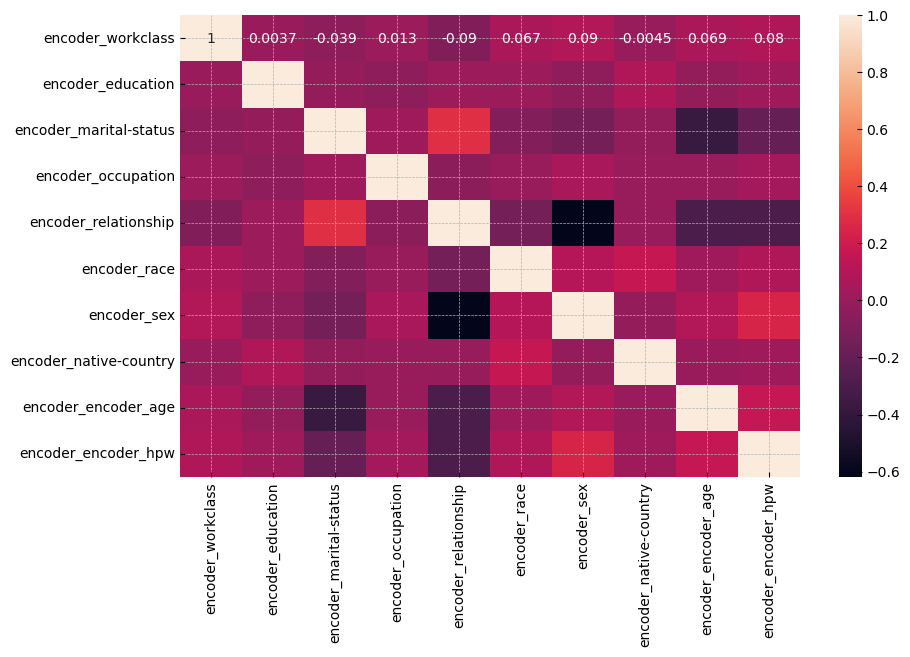

In [189]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(X_data.corr(method='spearman'), annot=True, ax=ax)

In [190]:
#Separamos los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3)

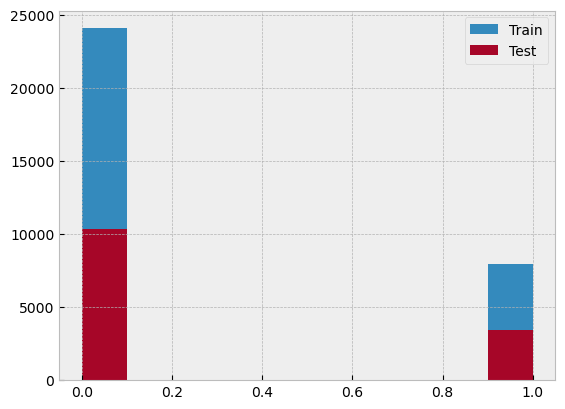

In [191]:
plt.hist(y_train, label="Train")
plt.hist(y_test, label="Test")
plt.legend()
plt.show()

# Esto es de la primera entrega de análisis de modelos

# 8.- Algoritmos de Machine Learning
## 8.1.- Aprendizage supervizado
### https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

### 8.1.- Modelo Lineal

In [192]:
%%time
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred_lineal = reg.predict(X_test)

CPU times: total: 46.9 ms
Wall time: 522 ms


In [193]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(32031, 10) (13728, 10)
(32031,) (13728,)


In [194]:
X_train.columns

Index(['encoder_workclass', 'encoder_education', 'encoder_marital-status',
       'encoder_occupation', 'encoder_relationship', 'encoder_race',
       'encoder_sex', 'encoder_native-country', 'encoder_encoder_age',
       'encoder_encoder_hpw'],
      dtype='object')

In [195]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_lineal))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_lineal))

Coefficients: 
 [-0.0789323   0.12091544 -0.17928044  0.04527394 -0.11439712  0.06883265
  0.09148323  0.00853673  0.29187474  0.38512243]
Mean squared error: 0.16
Coefficient of determination: 0.16


In [196]:
comparativo_lineal = pd.DataFrame({'actual' : y_test,'prediccion' : y_pred_lineal})
comparativo_lineal

actual  prediccion
44044     0.0    0.398576
13872     0.0    0.292477
4497      0.0    0.303683
22010     0.0    0.071561
18217     1.0    0.338479
...       ...         ...
32068     0.0    0.048636
35844     0.0    0.200009
18973     0.0    0.138294
2713      0.0    0.224849
38636     0.0    0.014570

[13728 rows x 2 columns]

### 8.1.1 Error

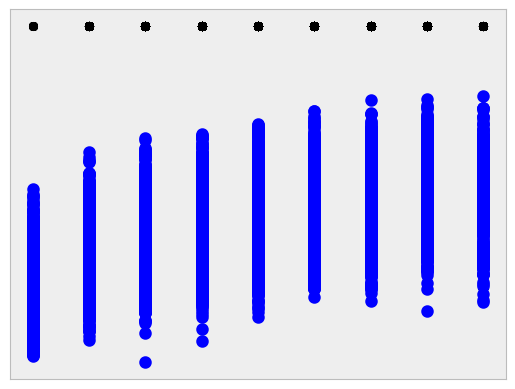

In [197]:
# Plot outputs
plt.scatter(X_test['encoder_encoder_age'], y_test, color="black")
plt.scatter(X_test['encoder_encoder_age'], y_pred_lineal, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

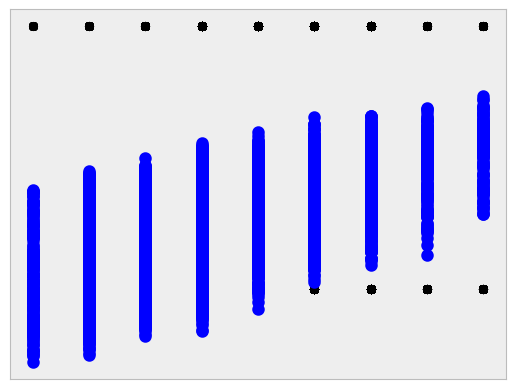

In [198]:
# Plot outputs
plt.scatter(X_test['encoder_encoder_hpw'], y_test, color="black")
plt.scatter(X_test['encoder_encoder_hpw'], y_pred_lineal, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

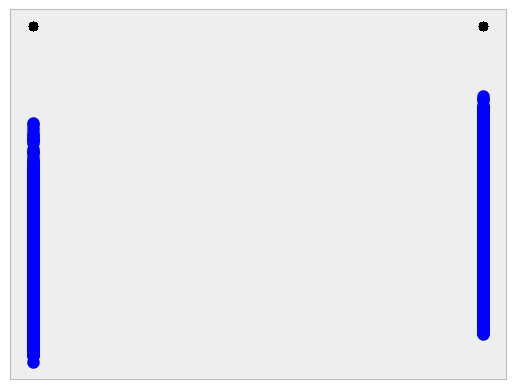

In [199]:
# Plot outputs
plt.scatter(X_test['encoder_sex'], y_test, color="black")
plt.scatter(X_test['encoder_sex'], y_pred_lineal, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

* _El modelo de regresión no aplica porque so para variable target continua, nosotros estamos ante un caso de variable target categórica_

### 8.2.- Modelo de árbol de decisión

In [200]:
%%time
#training del modelo
from sklearn import tree

model_dtc_default = tree.DecisionTreeClassifier(random_state = 42) # con hiperparametros default
model_dtc_default.fit(X_train, y_train)

#modelo generado con algun hiperparamtros diferente
model_dtc_max_depth = tree.DecisionTreeClassifier(random_state = 42, max_depth=3)
model_dtc_max_depth.fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 576 ms


DecisionTreeClassifier(max_depth=3, random_state=42)

In [201]:

#prediccion
y_pred_dtc = model_dtc_max_depth.predict(X_test)
y_pred_dtc

array([0., 0., 1., ..., 0., 0., 0.])

In [202]:
df_final_encoder['encoder_income'].unique()

array([0., 1.])

KeyboardInterrupt: 

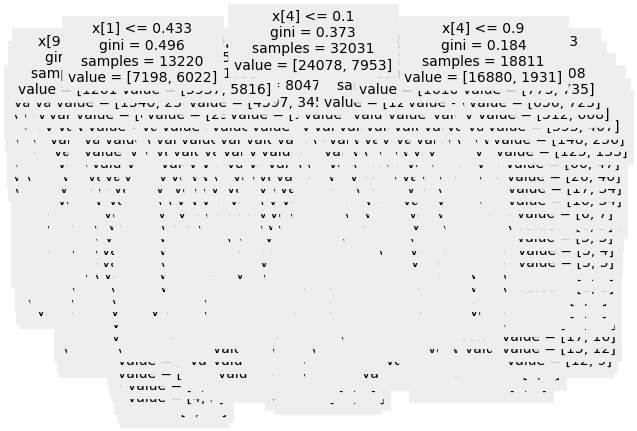

In [203]:
tree.plot_tree(model_dtc_default)

In [ ]:
tree.plot_tree(model_dtc_max_depth)

In [212]:
# METRICAS
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#accuracy
print('Modelo Decision Tree Classifier accuracy score criterio "gini": {0:0.4f}'. format(accuracy_score(y_test, y_pred_dtc)))


Modelo Decision Tree Classifier accuracy score criterio "gini": 0.6754


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz_dtc = confusion_matrix(y_test, y_pred_dtc)
print('Confusion matrix\n\n', matriz_dtc)

* _veo que el árbol sin seteos de hiperparámetros da como resultado árboles muy grandes_
* _de la matriz de confusión veo que el modelo tiene algunos problemas en la detección de FN_

In [ ]:
#Grafiquemos la matriz
cm = confusion_matrix(y_test, y_pred_dtc, labels=model_dtc_default.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_dtc_default.classes_)
disp.plot()
plt.show()

In [ ]:
comparativo_dtc = pd.DataFrame({'actual' : y_test,'prediccion' : y_pred_dtc})
comparativo_dtc

In [ ]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": model_dtc_default.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

* _Podemos ver que los valores que más influyen son_
    * _relationship_
    * _education_
    * _age_
    * _occupation_
    * _hours-per-week_

#### Dejo este código comentado porque tarda mucho y estoy aplicando el modelo por default sin hipertuning 

### 8.3- RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
%%time
# crear el clasificador
model_rfc_default = RandomForestClassifier(n_estimators=100, criterion='gini') #default

# Entrenar el modelo usando el conjunto de entranamiento
model_rfc_default.fit(X_train, y_train)

In [ ]:

#fiteo la var x_test ya escalada
y_pred_rfc_default = model_rfc_default.predict(X_test)

In [ ]:
y_pred_rfc_default

In [ ]:
X_test['pred'] = y_pred_rfc_default
X_test['target'] = y_test
X_test.head()

In [ ]:
matriz_rfc = confusion_matrix(y_test, y_pred_rfc_default, labels=model_rfc_default.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_rfc,
                              display_labels=model_rfc_default.classes_)
disp.plot()
plt.show()

In [ ]:
print('Modelo Random Forest Classifier accuracy score criterio "gini": {0:0.4f}'. format(accuracy_score(y_test, y_pred_rfc_default)))

* _Este modelo mejora TP_

In [ ]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": model_rfc_default.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

* _Podemos ver que los valores que más influyen son_
    * _age_
    * _education_
    * _occupation_
    * _relationship_
    * _marital-status_
    * _hours-per-week_


## 8.4.- Vecinos Cercanos

In [204]:
X_data.head()

encoder_workclass  encoder_education  encoder_marital-status  \
0           0.833333           0.600000                    0.50   
1           0.666667           0.600000                    0.25   
2           0.333333           0.733333                    0.00   
3           0.333333           0.066667                    0.25   
4           0.333333           0.600000                    0.25   

   encoder_occupation  encoder_relationship  encoder_race  encoder_sex  \
0            0.000000                   0.2           1.0          1.0   
1            0.230769                   0.0           1.0          1.0   
2            0.384615                   0.2           1.0          1.0   
3            0.384615                   0.0           0.5          1.0   
4            0.692308                   1.0           0.5          0.0   

   encoder_native-country  encoder_encoder_age  encoder_encoder_hpw  
0                0.951220                0.375                0.375  
1                0.951220                0.625                0.125  
2                0.951220                0.375                0.375  
3                0.951220                0.750                0.375  
4                0.121951                0.125                0.375

In [205]:
Y_data.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: encoder_income, dtype: float64

In [206]:
print(X_data.shape,Y_data.shape)

(45759, 10) (45759,)


In [207]:
X_train.head()

encoder_workclass  encoder_education  encoder_marital-status  \
1519            0.333333           0.266667                    0.50   
6088            0.333333           0.466667                    0.50   
33430           0.333333           0.733333                    0.50   
7419            0.833333           0.600000                    0.25   
25633           0.333333           0.733333                    0.50   

       encoder_occupation  encoder_relationship  encoder_race  encoder_sex  \
1519             0.307692                   0.2           1.0          1.0   
6088             1.000000                   0.2           1.0          1.0   
33430            0.384615                   0.6           1.0          1.0   
7419             0.923077                   0.0           1.0          1.0   
25633            0.538462                   0.2           1.0          0.0   

       encoder_native-country  encoder_encoder_age  encoder_encoder_hpw  
1519                 0.634146                0.125                0.375  
6088                 0.487805                0.375                0.625  
33430                0.951220                0.125                0.750  
7419                 0.951220                0.250                0.125  
25633                0.951220                0.125                0.375

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3)

In [209]:
%%time
from sklearn.neighbors import KNeighborsClassifier
# Paso 1
model_knn = KNeighborsClassifier(n_neighbors=5)#default 5

# Paso 2
model_knn.fit(X_train, y_train)

CPU times: total: 46.9 ms
Wall time: 64.3 ms


KNeighborsClassifier()

In [210]:
# Paso 3
y_pred_knn = model_knn.predict(X_test) #Prediccion en Test

#KNeighborsClassifier?

In [213]:
#Calculo el accuracy en Test
#from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test, y_pred_knn)

#print('% de aciertos sobre el set de evaluación:',knn_accuracy)
print('Modelo vecinos cercanos Classifier accuracy score: {0:0.4f}'. format(knn_accuracy))

Modelo vecinos cercanos Classifier accuracy score: 0.8045


In [214]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion matrix\n\n', matriz_knn)

Confusion matrix

 [[9146 1247]
 [1437 1898]]


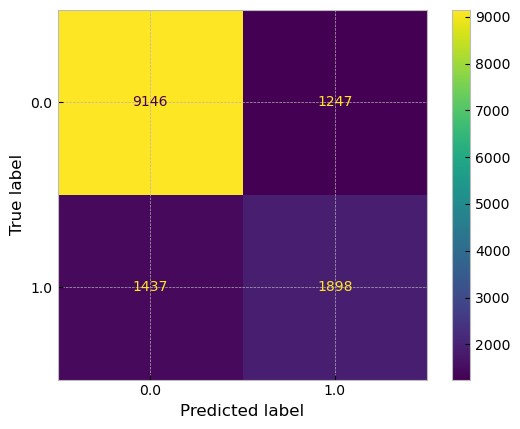

In [215]:
#Grafiquemos la matriz
cm = confusion_matrix(y_test, y_pred_knn, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_knn.classes_)
disp.plot()
plt.show()

## 8.5.- Super Vector Magine Classifier

In [216]:
from sklearn.svm import SVC
# Paso 1
model_svm = SVC(C = 100, kernel = 'linear', random_state=123)

In [217]:
%%time
# Paso 2
model_svm.fit(X_train, y_train)

CPU times: total: 5min 30s
Wall time: 6min 33s


SVC(C=100, kernel='linear', random_state=123)

In [218]:
# Paso 3
y_pred_svm = model_svm.predict(X_test) #Prediccion en Test

In [219]:
#Calculo el accuracy en Test
svm_accuracy = accuracy_score(y_test, y_pred_svm)

#print('% de aciertos sobre el set de evaluación:',knn_accuracy)
print('Modelo Super vector machine Classifier accuracy score: {0:0.4f}'. format(svm_accuracy))

Modelo Super vector machine Classifier accuracy score: 0.7571


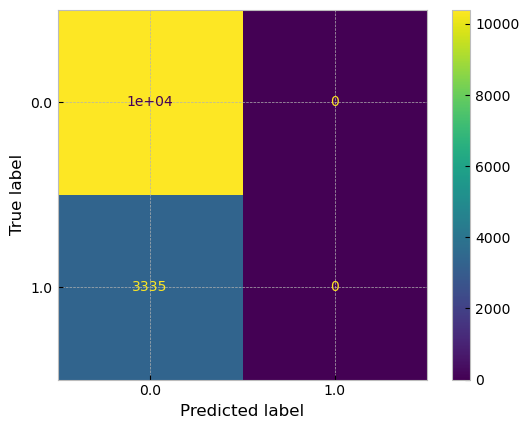

In [220]:
#Grafiquemos la matriz
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=model_svm.classes_)
disp.plot()
plt.show()

# 9.- Hypertunning (Mejoras) de parámetros en modelos de ML

### 9.1.- Validación cruzada
#### Seleccionar un modelos que no confíe demasiado en el conjunt de entrenamiento (TRAIN)
#### Dos tipos: K-Fold y LOO (Leave-One-Out) con p=1

## 9.2.- Random Forest con StratifiedKfold
### vecinos cercanos

In [ ]:
print(X_data.shape,Y_data.shape)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Paso 1
#knn = KNeighborsClassifier(n_neighbors=3)#, random_state=11
# crear el procedimiento loocv
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(X_data, Y_data)

In [ ]:
train, test = list(skf.split(X_data, Y_data))[0]
train

In [ ]:
test

In [ ]:
X_data.loc[test]

In [ ]:
from sklearn.metrics import accuracy_score
# Modelo vacio
modelo_ckf_t = RandomForestClassifier(random_state=1,n_estimators=30, criterion="gini",max_depth=4)
# Lista para guardar accuracy

In [ ]:
# Lista para guardar accuracy
list_ac=[]
for i in range(0,skf.get_n_splits(X_data, Y_data)):
  # Calculo de indices
  train, test = list(skf.split(X_data, Y_data))[i]
  # Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= X_data.loc[train], Y_data.loc[train], X_data.loc[test],Y_data.loc[test]
  # Ajustar el modelo
  modelo_ckf_t.fit(X_train_n, y_train_n)
  # Predicciones
  pred= modelo_ckf_t.predict(X_test_n)
  # Calculo del error
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)

In [ ]:
# Promedio de accuracy
import numpy as np
print('Accuracy promedio:', np.mean(list_ac))

## 9.3.- Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
# Paso 1
modelo_clf_t = RandomForestClassifier(random_state=11, n_jobs=6)#, max_features: 0.2, n_estimators: 2048
# Paso 2
modelo_clf_t.fit(X_train, y_train)
# Paso 3
y_test_pred = model.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

In [ ]:
#Grafiquemos la matriz
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Definir la grilla de los parametros, cada combinación es un modelo adicional
param_grid = {'n_estimators': [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048],
              'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [ ]:
# Paso 1
Modelo_clf_t = RandomForestClassifier()

# Paso NUEVO
from sklearn.model_selection import GridSearchCV
GS_RF = GridSearchCV(modelo_clf_t,
                     param_grid=param_grid,
                     cv=5,
                     n_jobs=4,
                     verbose=0)

In [ ]:
%%time
# Paso 2
GS_RF.fit(X_train, y_train)

In [ ]:
GS_RF.best_params_

In [ ]:
clf_op = GS_RF.best_estimator_
y_test_pred = clf_op.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

In [ ]:
#Grafiquemos la matriz
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### buscar los mejores estimadores de parámetros

In [ ]:
# Que un algoritmo busque los mejores parámetros dentro del rango
from scipy.stats import uniform, randint

param_dist = {"n_estimators": randint(4, 2048),
              "max_features": uniform(0, 1)}

# y el número de iteraciones, dependiendo de esto se consume más tiempo

iteraciones = 10

In [ ]:
# Importar librerias
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Paso 1
modelo_clf_t_2 = RandomForestClassifier()
# Paso NUEVO
RS_RF = RandomizedSearchCV(modelo_clf_t_2,
                           param_distributions =param_dist,
                           n_iter = iteraciones,
                           cv=5,
                           n_jobs=4,
                           verbose=0)

In [ ]:
%%time
RS_RF.fit(X_train, y_train)

In [ ]:
RS_RF.best_params_

In [ ]:
clf_op = RS_RF.best_estimator_

In [ ]:
y_test_pred = clf_op.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

### 9.4.- Pesos de variables

In [ ]:
df_final_num.columns

In [ ]:
importances = clf_op.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
indices

In [ ]:
print("Importancia de características:")

for f in range(X_train.shape[1]):
    print("Característica %s (%f)" % (df_final_num.columns[int(1+indices[f])], importances[indices[f]]))

In [ ]:
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train.shape[1]), importances[indices],
       align="center")
xticks_labels = [df.columns[1+i] for i in indices]
plt.xticks(range(X.shape[1]), xticks_labels, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## 9.5.- Super Vector machine (SVN)

### 9.5.1.- Modelo LINEAL

In [ ]:
%%time
from sklearn.svm import SVC
# Paso 1
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

### 9.5.2.- Modelo POLY

In [ ]:
%%time
# Paso 1
modelo = SVC(C = 100, kernel = 'poly', random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

### 9.5.3.- Modelo RBF

In [ ]:
%%time
# Paso 1
modelo = SVC(C = 100, kernel = 'rbf', random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

### 9.5.4.- Modelo SIGMOID

In [ ]:
%%time
# Paso 1
modelo = SVC(C = 100, kernel = 'sigmoid', random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

### 9.6.- Gradiente potenciado basado en árboles

from lightgbm import LGBMClassifier
# Paso 1
modelo = LGBMClassifier(random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

resultados = pd.concat([pd.DataFrame(GS_RF.cv_results_['params']),
                        pd.DataFrame(GS_RF.cv_results_['mean_test_score'], columns=['mean_test_score'])], axis=1)
resultados

# 10.- Métricas de los Algoritmos de CLASIFICACIÓN

In [ ]:
# Librerías
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

1. Apuntes:
* Definimos matriz de diseño X y vector respuesta y
    * X = pd.DataFrame(data['data'], columns=data['feature_names'])
    * y = abs(pd.Series(data['target'])-1)
* Separamos en entrenamiento/test en razon 80/20 %
    * X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
* Creamos un modelo Random Forest con parametros por defect
    * modelo = RandomForestClassifier(random_state=1)
    * modelo.fit(X_train, y_train)
* Obtenemos las predicciones del modelo con X_test
    * preds = modelo.predict(X_test)

2. Matriz de confusión:
    * plt.figure(figsize=(10,6))
    * metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])
    * confusion = metrics.confusion_matrix(y_test, preds)
    * confusion.ravel()
  
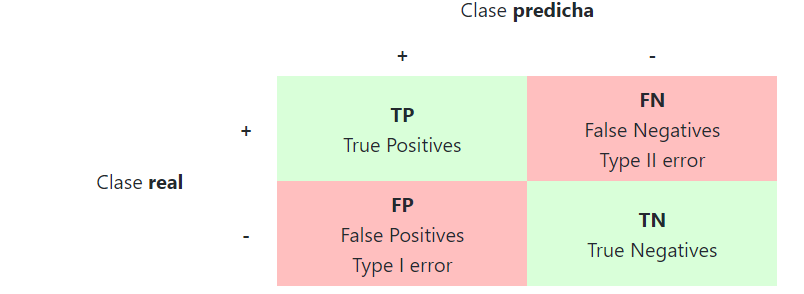

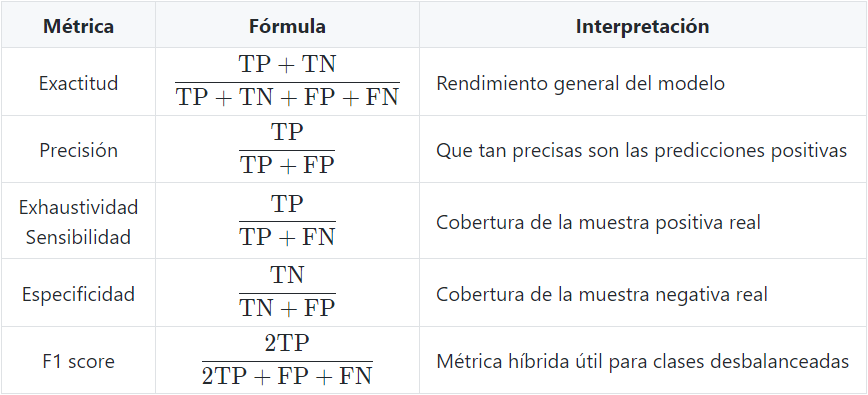

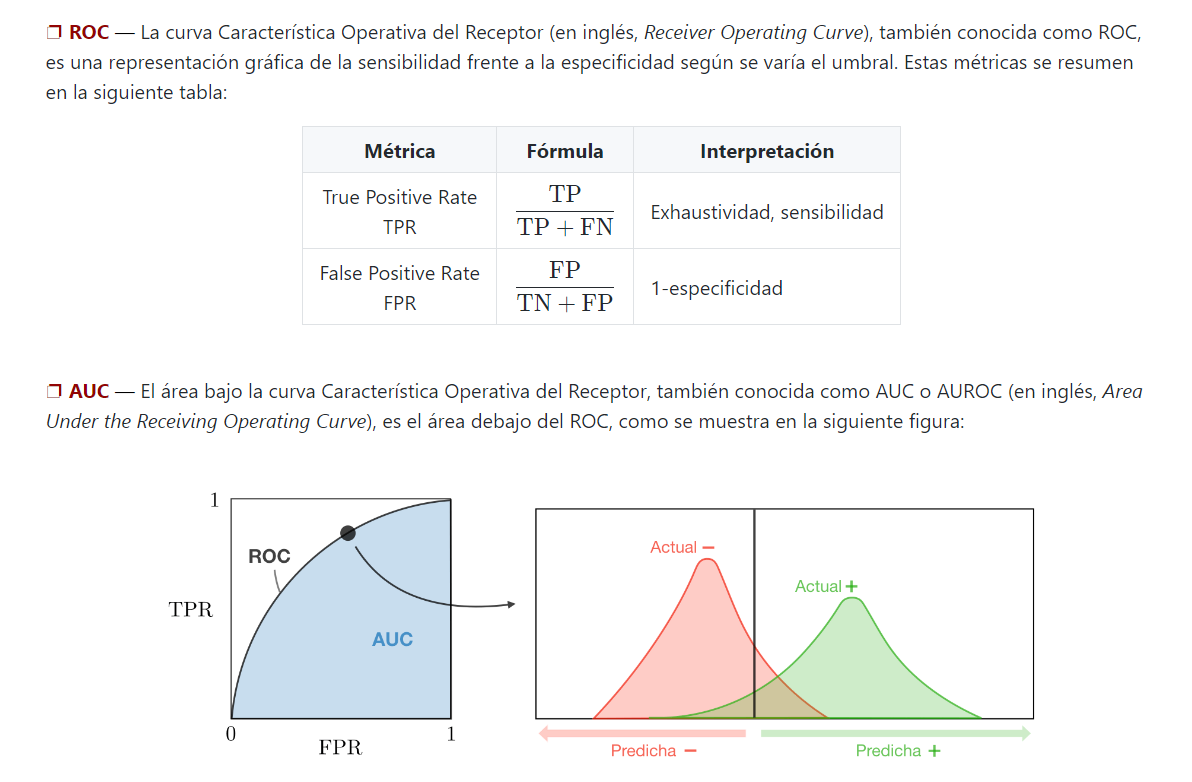

## 10.1.- Accuracy (Exactitud)
### Sesgo de una estimación
### Proximidad entre una predicción y el valor verdadero

preds = y_test_pred
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

## 10.2.- Precisión
### Dispersión de resultados en calculos repetitivos 

# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa

## 10.3.- Sensibilidad
### Predicciones correctas Positivas[verdaderos positivos]
### VP/(VP+FN)

recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

## 10.4.- Especificidad
### Predicciones correctas Negativas[verdaderos negativos]
### VN/(VN+FP)

## 10.5.- F1-SCORE
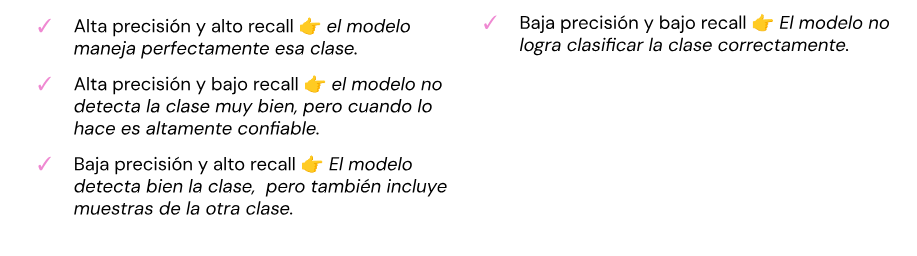

f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo

## 10.6.- Resumen de todas las métricas de desempeño del modelo

# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))